# Project 1 - Team 7


  
---

In [4]:
# Dependencies and setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st


# Import API key
# from Key1 import api_key

# Pollution data files
pollution_data_usa_path = "Resources/Data USA.csv"
pollution_data_canada_path= "Resources/Data Canada.csv"
pollution_data_chile_path="Resources/Data Chile.csv"
pollution_data_colombia_path="Resources/Data Colombia.csv"
pollution_data_mexico_path="Resources/Data Mexico.csv"
latitudes_longitudes_path="Resources/Cities (Latitude-Longitude).csv"

# Read the pollution data
usa_pollution_data= pd.read_csv(pollution_data_usa_path)
canada_pollution_data= pd.read_csv(pollution_data_canada_path)
chile_pollution_data= pd.read_csv(pollution_data_chile_path)
colombia_pollution_data= pd.read_csv(pollution_data_colombia_path)
mexico_pollution_data= pd.read_csv(pollution_data_mexico_path)
file_latitude_longitude= pd.read_csv(latitudes_longitudes_path,encoding='ISO-8859-1')

In [5]:
#Concatenating all the datasets
total_pollution_data=pd.concat([usa_pollution_data, canada_pollution_data,chile_pollution_data,colombia_pollution_data,mexico_pollution_data])

In [6]:
#Show the total pollution data
total_pollution_data

,Country,Cities,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,United States,New York,13.8,13.0,12.6,12.8,11.8,12.4,11.6,12.1,...,10.1,9.2,9.3,8.8,8.2,8.1,7.7,7.7,7.4,8.0
1,United States,Los Angeles,18.1,16.0,16.4,15.4,14.8,15.8,14.3,15.5,...,12.1,11.8,11.2,11.2,10.2,9.4,10.4,10.3,9.3,10.9
2,United States,Chicago,15.1,15.3,14.2,13.6,12.5,13.8,12.9,13.2,...,11.4,10.7,10.4,10.6,10.0,9.4,9.3,9.4,9.2,9.7
3,United States,Washington,14.0,13.1,13.4,14.0,12.8,13.4,12.4,12.4,...,10.2,9.8,9.0,8.7,8.5,8.0,7.7,7.9,7.5,7.6
4,United States,San Francisco,11.0,10.5,12.3,11.1,11.1,11.3,11.2,11.0,...,8.9,8.6,8.8,8.2,8.2,6.8,9.1,10.1,7.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Mexico,Teziutlan,30.7,25.4,24.9,25.3,23.3,23.5,24.1,23.6,...,21.9,20.5,20.8,20.0,19.8,18.4,18.2,16.4,15.1,15.4
88,Mexico,Apatzingan,25.4,22.0,22.6,22.3,20.7,21.3,21.6,21.4,...,19.8,18.2,18.8,17.4,17.3,17.2,16.9,15.3,13.4,13.1
89,Mexico,Zapotlan el Grande,23.5,20.6,21.0,20.6,19.1,20.1,20.1,19.6,...,18.8,16.7,17.3,16.4,16.5,16.6,15.9,14.2,12.6,12.5
90,Mexico,Hidalgo del Parral,21.1,20.1,21.2,19.6,17.7,17.8,19.2,18.6,...,19.0,16.6,16.7,16.0,15.7,15.4,14.4,13.1,11.3,12.5


In [7]:
#Reducing dataset (Only data 2010 until 2020)
total_pollution_data_2010_to_2020 = total_pollution_data.loc[:, ["Country", "Cities", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]]
total_pollution_data_2010_to_2020

 

,Country,Cities,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,United States,New York,9.5,10.1,9.2,9.3,8.8,8.2,8.1,7.7,7.7,7.4,8.0
1,United States,Los Angeles,11.7,12.1,11.8,11.2,11.2,10.2,9.4,10.4,10.3,9.3,10.9
2,United States,Chicago,11.2,11.4,10.7,10.4,10.6,10.0,9.4,9.3,9.4,9.2,9.7
3,United States,Washington,10.2,10.2,9.8,9.0,8.7,8.5,8.0,7.7,7.9,7.5,7.6
4,United States,San Francisco,8.9,8.9,8.6,8.8,8.2,8.2,6.8,9.1,10.1,7.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Mexico,Teziutlan,20.0,21.9,20.5,20.8,20.0,19.8,18.4,18.2,16.4,15.1,15.4
88,Mexico,Apatzingan,17.6,19.8,18.2,18.8,17.4,17.3,17.2,16.9,15.3,13.4,13.1
89,Mexico,Zapotlan el Grande,16.3,18.8,16.7,17.3,16.4,16.5,16.6,15.9,14.2,12.6,12.5
90,Mexico,Hidalgo del Parral,15.8,19.0,16.6,16.7,16.0,15.7,15.4,14.4,13.1,11.3,12.5


In [8]:
#Merging with the file with latitude and longitude of every city

Merged_df=pd.merge(total_pollution_data_2010_to_2020,file_latitude_longitude,left_on=['Cities','Country'], right_on=['city','country'],how='inner')
Merged_df=Merged_df[["Country", "Cities", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020","lat","lng"]]

#Removing duplicates (Some cities have multiple latitudes and longitudes since they are big cities)

merged_df_no_duplicates = Merged_df.drop_duplicates(subset=["Country", "Cities"])

            

In [9]:
#Export the City_Data into a csv
merged_df_no_duplicates.to_csv("Resources/total pollution data 2010 to 2020.csv",index=False)

In [10]:
#Show the full merged dataframe
merged_df_no_duplicates

,Country,Cities,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,lat,lng
0,United States,New York,9.5,10.1,9.2,9.3,8.8,8.2,8.1,7.7,7.7,7.4,8.0,40.6943,-73.9249
1,United States,Los Angeles,11.7,12.1,11.8,11.2,11.2,10.2,9.4,10.4,10.3,9.3,10.9,34.1141,-118.4068
2,United States,Chicago,11.2,11.4,10.7,10.4,10.6,10.0,9.4,9.3,9.4,9.2,9.7,41.8375,-87.6866
3,United States,Washington,10.2,10.2,9.8,9.0,8.7,8.5,8.0,7.7,7.9,7.5,7.6,38.9047,-77.0163
14,United States,San Francisco,8.9,8.9,8.6,8.8,8.2,8.2,6.8,9.1,10.1,7.2,9.5,37.7558,-122.4449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,Mexico,Delicias,16.6,19.5,17.2,17.4,16.7,16.6,15.8,15.6,14.3,12.2,13.0,28.1931,-105.4717
315,Mexico,Tuxpan,19.1,21.5,19.2,19.9,19.0,19.1,18.6,17.6,16.1,14.6,14.8,19.5539,-103.3756
318,Mexico,Iguala de la Independencia,17.8,19.8,18.0,19.3,17.3,17.2,17.6,16.6,15.4,13.8,13.4,18.3450,-99.5383
319,Mexico,Uriangato,19.1,21.6,19.5,20.2,19.2,18.8,19.0,18.1,16.4,14.2,14.2,20.1333,-101.1667


In [41]:
# Dividing dataframe into northern and southern hemisphere for later calculating the temperatures of the seasons
# The dataframe is being divided since the northen and southern hemisphere have seasons on different times of the year

Northern_hemisphere=merged_df_no_duplicates[(merged_df_no_duplicates['Country'] == "United States") | (merged_df_no_duplicates['Country'] == "Canada")|(merged_df_no_duplicates['Country']=="Mexico")]
Southern_hemisphere=merged_df_no_duplicates[(merged_df_no_duplicates['Country'] == "Chile") | (merged_df_no_duplicates['Country'] == "Colombia")]

In [73]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2010
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2010-03-19","2010-06-20","2010-09-21","2010-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2010=[]
temp_summer_2010=[]
temp_autumn_2010=[]
temp_winter_2010=[]
average_humidity_spring_2010=[]
average_humidity_summer_2010=[]
average_humidity_autumn_2010=[]
average_humidity_winter_2010=[]
average_wind_speed_spring_2010=[]
average_wind_speed_summer_2010=[]
average_wind_speed_autumn_2010=[]
average_wind_speed_winter_2010=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2010.append({"Max Temp (C) Spring 2010": city_max_temp})
                average_humidity_spring_2010.append({"Average Humidity Spring 2010": average_relative_humidity})
                average_wind_speed_spring_2010.append({"Average Wind Speed (m/s) Spring 2010": average_wind_speed})
            elif i == 1:
                temp_summer_2010.append({"Max Temp (C) Summer 2010": city_max_temp})
                average_humidity_summer_2010.append({"Average Humidity Summer 2010": average_relative_humidity})
                average_wind_speed_summer_2010.append({"Average Wind Speed (m/s) Summer 2010": average_wind_speed})
            elif i == 2:
                temp_autumn_2010.append({"Max Temp (C) Autumn 2010": city_max_temp})
                average_humidity_autumn_2010.append({"Average Humidity Autumn 2010": average_relative_humidity})
                average_wind_speed_autumn_2010.append({"Average Wind Speed (m/s) Autumn 2010": average_wind_speed})
            elif i == 3:
                temp_winter_2010.append({"Max Temp (C) Winter 2010": city_max_temp})
                average_humidity_winter_2010.append({"Average Humidity Winter 2010": average_relative_humidity})
                average_wind_speed_winter_2010.append({"Average Wind Speed (m/s) Winter 2010": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2010.append({"Max Temp (C) Spring 2010": None})
                average_humidity_spring_2010.append({"Average Humidity Spring 2010": None})
                average_wind_speed_spring_2010.append({"Average Wind Speed (m/s) Spring 2010": None})
            elif i == 1:
                temp_summer_2010.append({"Max Temp (C) Summer 2010": None})
                average_humidity_summer_2010.append({"Average Humidity Summer 2010": None})
                average_wind_speed_summer_2010.append({"Average Wind Speed (m/s) Summer 2010": None})
            elif i == 2:
                temp_autumn_2010.append({"Max Temp (C) Autumn 2010": None})
                average_humidity_autumn_2010.append({"Average Humidity Autumn 2010": None})
                average_wind_speed_autumn_2010.append({"Average Wind Speed (m/s) Autumn 2010": None})
            elif i == 3:
                temp_winter_2010.append({"Max Temp (C) Winter 2010": None})
                average_humidity_winter_2010.append({"Average Humidity Winter 2010": None})
                average_wind_speed_winter_2010.append({"Average Wind Speed (m/s) Winter 2010": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

In [75]:
#Converting all lists to dataframes
#Max temperatures 2010
df_temp_spring_2010 = pd.DataFrame.from_records(temp_spring_2010)
df_temp_summer_2010 = pd.DataFrame.from_records(temp_summer_2010)
df_temp_autumn_2010 = pd.DataFrame.from_records(temp_autumn_2010)
df_temp_winter_2010 = pd.DataFrame.from_records(temp_winter_2010)


#Average Humidity 2010
df_average_humidity_spring_2010 = pd.DataFrame.from_records(average_humidity_spring_2010)
df_average_humidity_summer_2010 = pd.DataFrame.from_records(average_humidity_summer_2010)
df_average_humidity_autumn_2010 = pd.DataFrame.from_records(average_humidity_autumn_2010)
df_average_humidity_winter_2010 = pd.DataFrame.from_records(average_humidity_winter_2010)


#Average Wind Speed 2010
df_average_wind_speed_spring_2010 = pd.DataFrame.from_records(average_wind_speed_spring_2010)
df_average_wind_speed_summer_2010 = pd.DataFrame.from_records(average_wind_speed_summer_2010)
df_average_wind_speed_autumn_2010 = pd.DataFrame.from_records(average_wind_speed_autumn_2010)
df_average_wind_speed_winter_2010 = pd.DataFrame.from_records(average_wind_speed_winter_2010)



In [77]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2011
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2011-03-19","2011-06-20","2011-09-21","2011-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2011=[]
temp_summer_2011=[]
temp_autumn_2011=[]
temp_winter_2011=[]
average_humidity_spring_2011=[]
average_humidity_summer_2011=[]
average_humidity_autumn_2011=[]
average_humidity_winter_2011=[]
average_wind_speed_spring_2011=[]
average_wind_speed_summer_2011=[]
average_wind_speed_autumn_2011=[]
average_wind_speed_winter_2011=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2011.append({"Max Temp (C) Spring 2011": city_max_temp})
                average_humidity_spring_2011.append({"Average Humidity Spring 2011": average_relative_humidity})
                average_wind_speed_spring_2011.append({"Average Wind Speed (m/s) Spring 2011": average_wind_speed})
            elif i == 1:
                temp_summer_2011.append({"Max Temp (C) Summer 2011": city_max_temp})
                average_humidity_summer_2011.append({"Average Humidity Summer 2011": average_relative_humidity})
                average_wind_speed_summer_2011.append({"Average Wind Speed (m/s) Summer 2011": average_wind_speed})
            elif i == 2:
                temp_autumn_2011.append({"Max Temp (C) Autumn 2011": city_max_temp})
                average_humidity_autumn_2011.append({"Average Humidity Autumn 2011": average_relative_humidity})
                average_wind_speed_autumn_2011.append({"Average Wind Speed (m/s) Autumn 2011": average_wind_speed})
            elif i == 3:
                temp_winter_2011.append({"Max Temp (C) Winter 2011": city_max_temp})
                average_humidity_winter_2011.append({"Average Humidity Winter 2011": average_relative_humidity})
                average_wind_speed_winter_2011.append({"Average Wind Speed (m/s) Winter 2011": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2011.append({"Max Temp (C) Spring 2011": None})
                average_humidity_spring_2011.append({"Average Humidity Spring 2011": None})
                average_wind_speed_spring_2011.append({"Average Wind Speed (m/s) Spring 2011": None})
            elif i == 1:
                temp_summer_2011.append({"Max Temp (C) Summer 2011": None})
                average_humidity_summer_2011.append({"Average Humidity Summer 2011": None})
                average_wind_speed_summer_2011.append({"Average Wind Speed (m/s) Summer 2011": None})
            elif i == 2:
                temp_autumn_2011.append({"Max Temp (C) Autumn 2011": None})
                average_humidity_autumn_2011.append({"Average Humidity Autumn 2011": None})
                average_wind_speed_autumn_2011.append({"Average Wind Speed (m/s) Autumn 2011": None})
            elif i == 3:
                temp_winter_2011.append({"Max Temp (C) Winter 2011": None})
                average_humidity_winter_2011.append({"Average Humidity Winter 2011": None})
                average_wind_speed_winter_2011.append({"Average Wind Speed (m/s) Winter 2011": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [78]:
#Converting all lists to dataframes
#Max temperatures 2011
df_temp_spring_2011 = pd.DataFrame.from_records(temp_spring_2011)
df_temp_summer_2011 = pd.DataFrame.from_records(temp_summer_2011)
df_temp_autumn_2011 = pd.DataFrame.from_records(temp_autumn_2011)
df_temp_winter_2011 = pd.DataFrame.from_records(temp_winter_2011)


#Average Humidity 2011
df_average_humidity_spring_2011 = pd.DataFrame.from_records(average_humidity_spring_2011)
df_average_humidity_summer_2011 = pd.DataFrame.from_records(average_humidity_summer_2011)
df_average_humidity_autumn_2011 = pd.DataFrame.from_records(average_humidity_autumn_2011)
df_average_humidity_winter_2011 = pd.DataFrame.from_records(average_humidity_winter_2011)


#Average Wind Speed 2011
df_average_wind_speed_spring_2011 = pd.DataFrame.from_records(average_wind_speed_spring_2011)
df_average_wind_speed_summer_2011 = pd.DataFrame.from_records(average_wind_speed_summer_2011)
df_average_wind_speed_autumn_2011 = pd.DataFrame.from_records(average_wind_speed_autumn_2011)
df_average_wind_speed_winter_2011 = pd.DataFrame.from_records(average_wind_speed_winter_2011)




In [83]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2012
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2012-03-19","2012-06-20","2012-09-21","2012-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2012=[]
temp_summer_2012=[]
temp_autumn_2012=[]
temp_winter_2012=[]
average_humidity_spring_2012=[]
average_humidity_summer_2012=[]
average_humidity_autumn_2012=[]
average_humidity_winter_2012=[]
average_wind_speed_spring_2012=[]
average_wind_speed_summer_2012=[]
average_wind_speed_autumn_2012=[]
average_wind_speed_winter_2012=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2012.append({"Max Temp (C) Spring 2012": city_max_temp})
                average_humidity_spring_2012.append({"Average Humidity Spring 2012": average_relative_humidity})
                average_wind_speed_spring_2012.append({"Average Wind Speed (m/s) Spring 2012": average_wind_speed})
            elif i == 1:
                temp_summer_2012.append({"Max Temp (C) Summer 2012": city_max_temp})
                average_humidity_summer_2012.append({"Average Humidity Summer 2012": average_relative_humidity})
                average_wind_speed_summer_2012.append({"Average Wind Speed (m/s) Summer 2012": average_wind_speed})
            elif i == 2:
                temp_autumn_2012.append({"Max Temp (C) Autumn 2012": city_max_temp})
                average_humidity_autumn_2012.append({"Average Humidity Autumn 2012": average_relative_humidity})
                average_wind_speed_autumn_2012.append({"Average Wind Speed (m/s) Autumn 2012": average_wind_speed})
            elif i == 3:
                temp_winter_2012.append({"Max Temp (C) Winter 2012": city_max_temp})
                average_humidity_winter_2012.append({"Average Humidity Winter 2012": average_relative_humidity})
                average_wind_speed_winter_2012.append({"Average Wind Speed (m/s) Winter 2012": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2012.append({"Max Temp (C) Spring 2012": None})
                average_humidity_spring_2012.append({"Average Humidity Spring 2012": None})
                average_wind_speed_spring_2012.append({"Average Wind Speed (m/s) Spring 2012": None})
            elif i == 1:
                temp_summer_2012.append({"Max Temp (C) Summer 2012": None})
                average_humidity_summer_2012.append({"Average Humidity Summer 2012": None})
                average_wind_speed_summer_2012.append({"Average Wind Speed (m/s) Summer 2012": None})
            elif i == 2:
                temp_autumn_2012.append({"Max Temp (C) Autumn 2012": None})
                average_humidity_autumn_2012.append({"Average Humidity Autumn 2012": None})
                average_wind_speed_autumn_2012.append({"Average Wind Speed (m/s) Autumn 2012": None})
            elif i == 3:
                temp_winter_2012.append({"Max Temp (C) Winter 2012": None})
                average_humidity_winter_2012.append({"Average Humidity Winter 2012": None})
                average_wind_speed_winter_2012.append({"Average Wind Speed (m/s) Winter 2012": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

In [88]:
#Converting all lists to dataframes
#Max temperatures 2012
df_temp_spring_2012 = pd.DataFrame.from_records(temp_spring_2012)
df_temp_summer_2012 = pd.DataFrame.from_records(temp_summer_2012)
df_temp_autumn_2012 = pd.DataFrame.from_records(temp_autumn_2012)
df_temp_winter_2012 = pd.DataFrame.from_records(temp_winter_2012)


#Average Humidity 2012
df_average_humidity_spring_2012 = pd.DataFrame.from_records(average_humidity_spring_2012)
df_average_humidity_summer_2012 = pd.DataFrame.from_records(average_humidity_summer_2012)
df_average_humidity_autumn_2012 = pd.DataFrame.from_records(average_humidity_autumn_2012)
df_average_humidity_winter_2012 = pd.DataFrame.from_records(average_humidity_winter_2012)


#Average Wind Speed 2012
df_average_wind_speed_spring_2012 = pd.DataFrame.from_records(average_wind_speed_spring_2012)
df_average_wind_speed_summer_2012 = pd.DataFrame.from_records(average_wind_speed_summer_2012)
df_average_wind_speed_autumn_2012 = pd.DataFrame.from_records(average_wind_speed_autumn_2012)
df_average_wind_speed_winter_2012 = pd.DataFrame.from_records(average_wind_speed_winter_2012)

In [89]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2013
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2013-03-19","2013-06-20","2013-09-21","2013-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2013=[]
temp_summer_2013=[]
temp_autumn_2013=[]
temp_winter_2013=[]
average_humidity_spring_2013=[]
average_humidity_summer_2013=[]
average_humidity_autumn_2013=[]
average_humidity_winter_2013=[]
average_wind_speed_spring_2013=[]
average_wind_speed_summer_2013=[]
average_wind_speed_autumn_2013=[]
average_wind_speed_winter_2013=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2013.append({"Max Temp (C) Spring 2013": city_max_temp})
                average_humidity_spring_2013.append({"Average Humidity Spring 2013": average_relative_humidity})
                average_wind_speed_spring_2013.append({"Average Wind Speed (m/s) Spring 2013": average_wind_speed})
            elif i == 1:
                temp_summer_2013.append({"Max Temp (C) Summer 2013": city_max_temp})
                average_humidity_summer_2013.append({"Average Humidity Summer 2013": average_relative_humidity})
                average_wind_speed_summer_2013.append({"Average Wind Speed (m/s) Summer 2013": average_wind_speed})
            elif i == 2:
                temp_autumn_2013.append({"Max Temp (C) Autumn 2013": city_max_temp})
                average_humidity_autumn_2013.append({"Average Humidity Autumn 2013": average_relative_humidity})
                average_wind_speed_autumn_2013.append({"Average Wind Speed (m/s) Autumn 2013": average_wind_speed})
            elif i == 3:
                temp_winter_2013.append({"Max Temp (C) Winter 2013": city_max_temp})
                average_humidity_winter_2013.append({"Average Humidity Winter 2013": average_relative_humidity})
                average_wind_speed_winter_2013.append({"Average Wind Speed (m/s) Winter 2013": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2013.append({"Max Temp (C) Spring 2013": None})
                average_humidity_spring_2013.append({"Average Humidity Spring 2013": None})
                average_wind_speed_spring_2013.append({"Average Wind Speed (m/s) Spring 2013": None})
            elif i == 1:
                temp_summer_2013.append({"Max Temp (C) Summer 2013": None})
                average_humidity_summer_2013.append({"Average Humidity Summer 2013": None})
                average_wind_speed_summer_2013.append({"Average Wind Speed (m/s) Summer 2013": None})
            elif i == 2:
                temp_autumn_2013.append({"Max Temp (C) Autumn 2013": None})
                average_humidity_autumn_2013.append({"Average Humidity Autumn 2013": None})
                average_wind_speed_autumn_2013.append({"Average Wind Speed (m/s) Autumn 2013": None})
            elif i == 3:
                temp_winter_2013.append({"Max Temp (C) Winter 2013": None})
                average_humidity_winter_2013.append({"Average Humidity Winter 2013": None})
                average_wind_speed_winter_2013.append({"Average Wind Speed (m/s) Winter 2013": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

In [90]:
#Converting all lists to dataframes
#Max temperatures 2013
df_temp_spring_2013 = pd.DataFrame.from_records(temp_spring_2013)
df_temp_summer_2013 = pd.DataFrame.from_records(temp_summer_2013)
df_temp_autumn_2013 = pd.DataFrame.from_records(temp_autumn_2013)
df_temp_winter_2013 = pd.DataFrame.from_records(temp_winter_2013)

#Average Humidity 2013
df_average_humidity_spring_2013 = pd.DataFrame.from_records(average_humidity_spring_2013)
df_average_humidity_summer_2013 = pd.DataFrame.from_records(average_humidity_summer_2013)
df_average_humidity_autumn_2013 = pd.DataFrame.from_records(average_humidity_autumn_2013)
df_average_humidity_winter_2013 = pd.DataFrame.from_records(average_humidity_winter_2013)

#Average Wind Speed 2013
df_average_wind_speed_spring_2013 = pd.DataFrame.from_records(average_wind_speed_spring_2013)
df_average_wind_speed_summer_2013 = pd.DataFrame.from_records(average_wind_speed_summer_2013)
df_average_wind_speed_autumn_2013 = pd.DataFrame.from_records(average_wind_speed_autumn_2013)
df_average_wind_speed_winter_2013 = pd.DataFrame.from_records(average_wind_speed_winter_2013)


In [92]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2014
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2014-03-19","2014-06-20","2014-09-21","2014-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2014=[]
temp_summer_2014=[]
temp_autumn_2014=[]
temp_winter_2014=[]
average_humidity_spring_2014=[]
average_humidity_summer_2014=[]
average_humidity_autumn_2014=[]
average_humidity_winter_2014=[]
average_wind_speed_spring_2014=[]
average_wind_speed_summer_2014=[]
average_wind_speed_autumn_2014=[]
average_wind_speed_winter_2014=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2014.append({"Max Temp (C) Spring 2014": city_max_temp})
                average_humidity_spring_2014.append({"Average Humidity Spring 2014": average_relative_humidity})
                average_wind_speed_spring_2014.append({"Average Wind Speed (m/s) Spring 2014": average_wind_speed})
            elif i == 1:
                temp_summer_2014.append({"Max Temp (C) Summer 2014": city_max_temp})
                average_humidity_summer_2014.append({"Average Humidity Summer 2014": average_relative_humidity})
                average_wind_speed_summer_2014.append({"Average Wind Speed (m/s) Summer 2014": average_wind_speed})
            elif i == 2:
                temp_autumn_2014.append({"Max Temp (C) Autumn 2014": city_max_temp})
                average_humidity_autumn_2014.append({"Average Humidity Autumn 2014": average_relative_humidity})
                average_wind_speed_autumn_2014.append({"Average Wind Speed (m/s) Autumn 2014": average_wind_speed})
            elif i == 3:
                temp_winter_2014.append({"Max Temp (C) Winter 2014": city_max_temp})
                average_humidity_winter_2014.append({"Average Humidity Winter 2014": average_relative_humidity})
                average_wind_speed_winter_2014.append({"Average Wind Speed (m/s) Winter 2014": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2014.append({"Max Temp (C) Spring 2014": None})
                average_humidity_spring_2014.append({"Average Humidity Spring 2014": None})
                average_wind_speed_spring_2014.append({"Average Wind Speed (m/s) Spring 2014": None})
            elif i == 1:
                temp_summer_2014.append({"Max Temp (C) Summer 2014": None})
                average_humidity_summer_2014.append({"Average Humidity Summer 2014": None})
                average_wind_speed_summer_2014.append({"Average Wind Speed (m/s) Summer 2014": None})
            elif i == 2:
                temp_autumn_2014.append({"Max Temp (C) Autumn 2014": None})
                average_humidity_autumn_2014.append({"Average Humidity Autumn 2014": None})
                average_wind_speed_autumn_2014.append({"Average Wind Speed (m/s) Autumn 2014": None})
            elif i == 3:
                temp_winter_2014.append({"Max Temp (C) Winter 2014": None})
                average_humidity_winter_2014.append({"Average Humidity Winter 2014": None})
                average_wind_speed_winter_2014.append({"Average Wind Speed (m/s) Winter 2014": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

In [96]:
#Converting all lists to dataframes
#Max temperatures 2014
df_temp_spring_2014 = pd.DataFrame.from_records(temp_spring_2014)
df_temp_summer_2014 = pd.DataFrame.from_records(temp_summer_2014)
df_temp_autumn_2014 = pd.DataFrame.from_records(temp_autumn_2014)
df_temp_winter_2014 = pd.DataFrame.from_records(temp_winter_2014)

#Average Humidity 2014
df_average_humidity_spring_2014 = pd.DataFrame.from_records(average_humidity_spring_2014)
df_average_humidity_summer_2014 = pd.DataFrame.from_records(average_humidity_summer_2014)
df_average_humidity_autumn_2014 = pd.DataFrame.from_records(average_humidity_autumn_2014)
df_average_humidity_winter_2014 = pd.DataFrame.from_records(average_humidity_winter_2014)

#Average Wind Speed 2014
df_average_wind_speed_spring_2014 = pd.DataFrame.from_records(average_wind_speed_spring_2014)
df_average_wind_speed_summer_2014 = pd.DataFrame.from_records(average_wind_speed_summer_2014)
df_average_wind_speed_autumn_2014 = pd.DataFrame.from_records(average_wind_speed_autumn_2014)
df_average_wind_speed_winter_2014 = pd.DataFrame.from_records(average_wind_speed_winter_2014)


In [98]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2015
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2015-03-19","2015-06-20","2015-09-21","2015-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2015=[]
temp_summer_2015=[]
temp_autumn_2015=[]
temp_winter_2015=[]
average_humidity_spring_2015=[]
average_humidity_summer_2015=[]
average_humidity_autumn_2015=[]
average_humidity_winter_2015=[]
average_wind_speed_spring_2015=[]
average_wind_speed_summer_2015=[]
average_wind_speed_autumn_2015=[]
average_wind_speed_winter_2015=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2015.append({"Max Temp (C) Spring 2015": city_max_temp})
                average_humidity_spring_2015.append({"Average Humidity Spring 2015": average_relative_humidity})
                average_wind_speed_spring_2015.append({"Average Wind Speed (m/s) Spring 2015": average_wind_speed})
            elif i == 1:
                temp_summer_2015.append({"Max Temp (C) Summer 2015": city_max_temp})
                average_humidity_summer_2015.append({"Average Humidity Summer 2015": average_relative_humidity})
                average_wind_speed_summer_2015.append({"Average Wind Speed (m/s) Summer 2015": average_wind_speed})
            elif i == 2:
                temp_autumn_2015.append({"Max Temp (C) Autumn 2015": city_max_temp})
                average_humidity_autumn_2015.append({"Average Humidity Autumn 2015": average_relative_humidity})
                average_wind_speed_autumn_2015.append({"Average Wind Speed (m/s) Autumn 2015": average_wind_speed})
            elif i == 3:
                temp_winter_2015.append({"Max Temp (C) Winter 2015": city_max_temp})
                average_humidity_winter_2015.append({"Average Humidity Winter 2015": average_relative_humidity})
                average_wind_speed_winter_2015.append({"Average Wind Speed (m/s) Winter 2015": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2015.append({"Max Temp (C) Spring 2015": None})
                average_humidity_spring_2015.append({"Average Humidity Spring 2015": None})
                average_wind_speed_spring_2015.append({"Average Wind Speed (m/s) Spring 2015": None})
            elif i == 1:
                temp_summer_2015.append({"Max Temp (C) Summer 2015": None})
                average_humidity_summer_2015.append({"Average Humidity Summer 2015": None})
                average_wind_speed_summer_2015.append({"Average Wind Speed (m/s) Summer 2015": None})
            elif i == 2:
                temp_autumn_2015.append({"Max Temp (C) Autumn 2015": None})
                average_humidity_autumn_2015.append({"Average Humidity Autumn 2015": None})
                average_wind_speed_autumn_2015.append({"Average Wind Speed (m/s) Autumn 2015": None})
            elif i == 3:
                temp_winter_2015.append({"Max Temp (C) Winter 2015": None})
                average_humidity_winter_2015.append({"Average Humidity Winter 2015": None})
                average_wind_speed_winter_2015.append({"Average Wind Speed (m/s) Winter 2015": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

In [99]:
#Converting all lists to dataframes
#Max temperatures 2015
df_temp_spring_2015 = pd.DataFrame.from_records(temp_spring_2015)
df_temp_summer_2015 = pd.DataFrame.from_records(temp_summer_2015)
df_temp_autumn_2015 = pd.DataFrame.from_records(temp_autumn_2015)
df_temp_winter_2015 = pd.DataFrame.from_records(temp_winter_2015)

#Average Humidity 2015
df_average_humidity_spring_2015 = pd.DataFrame.from_records(average_humidity_spring_2015)
df_average_humidity_summer_2015 = pd.DataFrame.from_records(average_humidity_summer_2015)
df_average_humidity_autumn_2015 = pd.DataFrame.from_records(average_humidity_autumn_2015)
df_average_humidity_winter_2015 = pd.DataFrame.from_records(average_humidity_winter_2015)

#Average Wind Speed 2015
df_average_wind_speed_spring_2015 = pd.DataFrame.from_records(average_wind_speed_spring_2015)
df_average_wind_speed_summer_2015 = pd.DataFrame.from_records(average_wind_speed_summer_2015)
df_average_wind_speed_autumn_2015 = pd.DataFrame.from_records(average_wind_speed_autumn_2015)
df_average_wind_speed_winter_2015 = pd.DataFrame.from_records(average_wind_speed_winter_2015)


In [100]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2016
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2016-03-19","2016-06-20","2016-09-21","2016-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2016=[]
temp_summer_2016=[]
temp_autumn_2016=[]
temp_winter_2016=[]
average_humidity_spring_2016=[]
average_humidity_summer_2016=[]
average_humidity_autumn_2016=[]
average_humidity_winter_2016=[]
average_wind_speed_spring_2016=[]
average_wind_speed_summer_2016=[]
average_wind_speed_autumn_2016=[]
average_wind_speed_winter_2016=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2016.append({"Max Temp (C) Spring 2016": city_max_temp})
                average_humidity_spring_2016.append({"Average Humidity Spring 2016": average_relative_humidity})
                average_wind_speed_spring_2016.append({"Average Wind Speed (m/s) Spring 2016": average_wind_speed})
            elif i == 1:
                temp_summer_2016.append({"Max Temp (C) Summer 2016": city_max_temp})
                average_humidity_summer_2016.append({"Average Humidity Summer 2016": average_relative_humidity})
                average_wind_speed_summer_2016.append({"Average Wind Speed (m/s) Summer 2016": average_wind_speed})
            elif i == 2:
                temp_autumn_2016.append({"Max Temp (C) Autumn 2016": city_max_temp})
                average_humidity_autumn_2016.append({"Average Humidity Autumn 2016": average_relative_humidity})
                average_wind_speed_autumn_2016.append({"Average Wind Speed (m/s) Autumn 2016": average_wind_speed})
            elif i == 3:
                temp_winter_2016.append({"Max Temp (C) Winter 2016": city_max_temp})
                average_humidity_winter_2016.append({"Average Humidity Winter 2016": average_relative_humidity})
                average_wind_speed_winter_2016.append({"Average Wind Speed (m/s) Winter 2016": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2016.append({"Max Temp (C) Spring 2016": None})
                average_humidity_spring_2016.append({"Average Humidity Spring 2016": None})
                average_wind_speed_spring_2016.append({"Average Wind Speed (m/s) Spring 2016": None})
            elif i == 1:
                temp_summer_2016.append({"Max Temp (C) Summer 2016": None})
                average_humidity_summer_2016.append({"Average Humidity Summer 2016": None})
                average_wind_speed_summer_2016.append({"Average Wind Speed (m/s) Summer 2016": None})
            elif i == 2:
                temp_autumn_2016.append({"Max Temp (C) Autumn 2016": None})
                average_humidity_autumn_2016.append({"Average Humidity Autumn 2016": None})
                average_wind_speed_autumn_2016.append({"Average Wind Speed (m/s) Autumn 2016": None})
            elif i == 3:
                temp_winter_2016.append({"Max Temp (C) Winter 2016": None})
                average_humidity_winter_2016.append({"Average Humidity Winter 2016": None})
                average_wind_speed_winter_2016.append({"Average Wind Speed (m/s) Winter 2016": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

In [103]:
#Converting all lists to dataframes
#Max temperatures 2016
df_temp_spring_2016 = pd.DataFrame.from_records(temp_spring_2016)
df_temp_summer_2016 = pd.DataFrame.from_records(temp_summer_2016)
df_temp_autumn_2016 = pd.DataFrame.from_records(temp_autumn_2016)
df_temp_winter_2016 = pd.DataFrame.from_records(temp_winter_2016)

#Average Humidity 2016
df_average_humidity_spring_2016 = pd.DataFrame.from_records(average_humidity_spring_2016)
df_average_humidity_summer_2016 = pd.DataFrame.from_records(average_humidity_summer_2016)
df_average_humidity_autumn_2016 = pd.DataFrame.from_records(average_humidity_autumn_2016)
df_average_humidity_winter_2016 = pd.DataFrame.from_records(average_humidity_winter_2016)

#Average Wind Speed 2016
df_average_wind_speed_spring_2016 = pd.DataFrame.from_records(average_wind_speed_spring_2016)
df_average_wind_speed_summer_2016 = pd.DataFrame.from_records(average_wind_speed_summer_2016)
df_average_wind_speed_autumn_2016 = pd.DataFrame.from_records(average_wind_speed_autumn_2016)
df_average_wind_speed_winter_2016 = pd.DataFrame.from_records(average_wind_speed_winter_2016)


In [104]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2017
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2017-03-19","2017-06-20","2017-09-21","2017-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2017=[]
temp_summer_2017=[]
temp_autumn_2017=[]
temp_winter_2017=[]
average_humidity_spring_2017=[]
average_humidity_summer_2017=[]
average_humidity_autumn_2017=[]
average_humidity_winter_2017=[]
average_wind_speed_spring_2017=[]
average_wind_speed_summer_2017=[]
average_wind_speed_autumn_2017=[]
average_wind_speed_winter_2017=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2017.append({"Max Temp (C) Spring 2017": city_max_temp})
                average_humidity_spring_2017.append({"Average Humidity Spring 2017": average_relative_humidity})
                average_wind_speed_spring_2017.append({"Average Wind Speed (m/s) Spring 2017": average_wind_speed})
            elif i == 1:
                temp_summer_2017.append({"Max Temp (C) Summer 2017": city_max_temp})
                average_humidity_summer_2017.append({"Average Humidity Summer 2017": average_relative_humidity})
                average_wind_speed_summer_2017.append({"Average Wind Speed (m/s) Summer 2017": average_wind_speed})
            elif i == 2:
                temp_autumn_2017.append({"Max Temp (C) Autumn 2017": city_max_temp})
                average_humidity_autumn_2017.append({"Average Humidity Autumn 2017": average_relative_humidity})
                average_wind_speed_autumn_2017.append({"Average Wind Speed (m/s) Autumn 2017": average_wind_speed})
            elif i == 3:
                temp_winter_2017.append({"Max Temp (C) Winter 2017": city_max_temp})
                average_humidity_winter_2017.append({"Average Humidity Winter 2017": average_relative_humidity})
                average_wind_speed_winter_2017.append({"Average Wind Speed (m/s) Winter 2017": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2017.append({"Max Temp (C) Spring 2017": None})
                average_humidity_spring_2017.append({"Average Humidity Spring 2017": None})
                average_wind_speed_spring_2017.append({"Average Wind Speed (m/s) Spring 2017": None})
            elif i == 1:
                temp_summer_2017.append({"Max Temp (C) Summer 2017": None})
                average_humidity_summer_2017.append({"Average Humidity Summer 2017": None})
                average_wind_speed_summer_2017.append({"Average Wind Speed (m/s) Summer 2017": None})
            elif i == 2:
                temp_autumn_2017.append({"Max Temp (C) Autumn 2017": None})
                average_humidity_autumn_2017.append({"Average Humidity Autumn 2017": None})
                average_wind_speed_autumn_2017.append({"Average Wind Speed (m/s) Autumn 2017": None})
            elif i == 3:
                temp_winter_2017.append({"Max Temp (C) Winter 2017": None})
                average_humidity_winter_2017.append({"Average Humidity Winter 2017": None})
                average_wind_speed_winter_2017.append({"Average Wind Speed (m/s) Winter 2017": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [105]:
#Converting all lists to dataframes
#Max temperatures 2017
df_temp_spring_2017 = pd.DataFrame.from_records(temp_spring_2017)
df_temp_summer_2017 = pd.DataFrame.from_records(temp_summer_2017)
df_temp_autumn_2017 = pd.DataFrame.from_records(temp_autumn_2017)
df_temp_winter_2017 = pd.DataFrame.from_records(temp_winter_2017)

#Average Humidity 2017
df_average_humidity_spring_2017 = pd.DataFrame.from_records(average_humidity_spring_2017)
df_average_humidity_summer_2017 = pd.DataFrame.from_records(average_humidity_summer_2017)
df_average_humidity_autumn_2017 = pd.DataFrame.from_records(average_humidity_autumn_2017)
df_average_humidity_winter_2017 = pd.DataFrame.from_records(average_humidity_winter_2017)

#Average Wind Speed 2017
df_average_wind_speed_spring_2017 = pd.DataFrame.from_records(average_wind_speed_spring_2017)
df_average_wind_speed_summer_2017 = pd.DataFrame.from_records(average_wind_speed_summer_2017)
df_average_wind_speed_autumn_2017 = pd.DataFrame.from_records(average_wind_speed_autumn_2017)
df_average_wind_speed_winter_2017 = pd.DataFrame.from_records(average_wind_speed_winter_2017)


In [106]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2018
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2018-03-19","2018-06-20","2018-09-21","2018-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2018=[]
temp_summer_2018=[]
temp_autumn_2018=[]
temp_winter_2018=[]
average_humidity_spring_2018=[]
average_humidity_summer_2018=[]
average_humidity_autumn_2018=[]
average_humidity_winter_2018=[]
average_wind_speed_spring_2018=[]
average_wind_speed_summer_2018=[]
average_wind_speed_autumn_2018=[]
average_wind_speed_winter_2018=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2018.append({"Max Temp (C) Spring 2018": city_max_temp})
                average_humidity_spring_2018.append({"Average Humidity Spring 2018": average_relative_humidity})
                average_wind_speed_spring_2018.append({"Average Wind Speed (m/s) Spring 2018": average_wind_speed})
            elif i == 1:
                temp_summer_2018.append({"Max Temp (C) Summer 2018": city_max_temp})
                average_humidity_summer_2018.append({"Average Humidity Summer 2018": average_relative_humidity})
                average_wind_speed_summer_2018.append({"Average Wind Speed (m/s) Summer 2018": average_wind_speed})
            elif i == 2:
                temp_autumn_2018.append({"Max Temp (C) Autumn 2018": city_max_temp})
                average_humidity_autumn_2018.append({"Average Humidity Autumn 2018": average_relative_humidity})
                average_wind_speed_autumn_2018.append({"Average Wind Speed (m/s) Autumn 2018": average_wind_speed})
            elif i == 3:
                temp_winter_2018.append({"Max Temp (C) Winter 2018": city_max_temp})
                average_humidity_winter_2018.append({"Average Humidity Winter 2018": average_relative_humidity})
                average_wind_speed_winter_2018.append({"Average Wind Speed (m/s) Winter 2018": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2018.append({"Max Temp (C) Spring 2018": None})
                average_humidity_spring_2018.append({"Average Humidity Spring 2018": None})
                average_wind_speed_spring_2018.append({"Average Wind Speed (m/s) Spring 2018": None})
            elif i == 1:
                temp_summer_2018.append({"Max Temp (C) Summer 2018": None})
                average_humidity_summer_2018.append({"Average Humidity Summer 2018": None})
                average_wind_speed_summer_2018.append({"Average Wind Speed (m/s) Summer 2018": None})
            elif i == 2:
                temp_autumn_2018.append({"Max Temp (C) Autumn 2018": None})
                average_humidity_autumn_2018.append({"Average Humidity Autumn 2018": None})
                average_wind_speed_autumn_2018.append({"Average Wind Speed (m/s) Autumn 2018": None})
            elif i == 3:
                temp_winter_2018.append({"Max Temp (C) Winter 2018": None})
                average_humidity_winter_2018.append({"Average Humidity Winter 2018": None})
                average_wind_speed_winter_2018.append({"Average Wind Speed (m/s) Winter 2018": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [107]:
#Converting all lists to dataframes
#Max temperatures 2018
df_temp_spring_2018 = pd.DataFrame.from_records(temp_spring_2018)
df_temp_summer_2018 = pd.DataFrame.from_records(temp_summer_2018)
df_temp_autumn_2018 = pd.DataFrame.from_records(temp_autumn_2018)
df_temp_winter_2018 = pd.DataFrame.from_records(temp_winter_2018)

#Average Humidity 2018
df_average_humidity_spring_2018 = pd.DataFrame.from_records(average_humidity_spring_2018)
df_average_humidity_summer_2018 = pd.DataFrame.from_records(average_humidity_summer_2018)
df_average_humidity_autumn_2018 = pd.DataFrame.from_records(average_humidity_autumn_2018)
df_average_humidity_winter_2018 = pd.DataFrame.from_records(average_humidity_winter_2018)

#Average Wind Speed 2018
df_average_wind_speed_spring_2018 = pd.DataFrame.from_records(average_wind_speed_spring_2018)
df_average_wind_speed_summer_2018 = pd.DataFrame.from_records(average_wind_speed_summer_2018)
df_average_wind_speed_autumn_2018 = pd.DataFrame.from_records(average_wind_speed_autumn_2018)
df_average_wind_speed_winter_2018 = pd.DataFrame.from_records(average_wind_speed_winter_2018)


In [108]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2019
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2019-03-19","2019-06-20","2019-09-21","2019-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2019=[]
temp_summer_2019=[]
temp_autumn_2019=[]
temp_winter_2019=[]
average_humidity_spring_2019=[]
average_humidity_summer_2019=[]
average_humidity_autumn_2019=[]
average_humidity_winter_2019=[]
average_wind_speed_spring_2019=[]
average_wind_speed_summer_2019=[]
average_wind_speed_autumn_2019=[]
average_wind_speed_winter_2019=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2019.append({"Max Temp (C) Spring 2019": city_max_temp})
                average_humidity_spring_2019.append({"Average Humidity Spring 2019": average_relative_humidity})
                average_wind_speed_spring_2019.append({"Average Wind Speed (m/s) Spring 2019": average_wind_speed})
            elif i == 1:
                temp_summer_2019.append({"Max Temp (C) Summer 2019": city_max_temp})
                average_humidity_summer_2019.append({"Average Humidity Summer 2019": average_relative_humidity})
                average_wind_speed_summer_2019.append({"Average Wind Speed (m/s) Summer 2019": average_wind_speed})
            elif i == 2:
                temp_autumn_2019.append({"Max Temp (C) Autumn 2019": city_max_temp})
                average_humidity_autumn_2019.append({"Average Humidity Autumn 2019": average_relative_humidity})
                average_wind_speed_autumn_2019.append({"Average Wind Speed (m/s) Autumn 2019": average_wind_speed})
            elif i == 3:
                temp_winter_2019.append({"Max Temp (C) Winter 2019": city_max_temp})
                average_humidity_winter_2019.append({"Average Humidity Winter 2019": average_relative_humidity})
                average_wind_speed_winter_2019.append({"Average Wind Speed (m/s) Winter 2019": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2019.append({"Max Temp (C) Spring 2019": None})
                average_humidity_spring_2019.append({"Average Humidity Spring 2019": None})
                average_wind_speed_spring_2019.append({"Average Wind Speed (m/s) Spring 2019": None})
            elif i == 1:
                temp_summer_2019.append({"Max Temp (C) Summer 2019": None})
                average_humidity_summer_2019.append({"Average Humidity Summer 2019": None})
                average_wind_speed_summer_2019.append({"Average Wind Speed (m/s) Summer 2019": None})
            elif i == 2:
                temp_autumn_2019.append({"Max Temp (C) Autumn 2019": None})
                average_humidity_autumn_2019.append({"Average Humidity Autumn 2019": None})
                average_wind_speed_autumn_2019.append({"Average Wind Speed (m/s) Autumn 2019": None})
            elif i == 3:
                temp_winter_2019.append({"Max Temp (C) Winter 2019": None})
                average_humidity_winter_2019.append({"Average Humidity Winter 2019": None})
                average_wind_speed_winter_2019.append({"Average Wind Speed (m/s) Winter 2019": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [109]:
#Converting all lists to dataframes
#Max temperatures 2019
df_temp_spring_2019 = pd.DataFrame.from_records(temp_spring_2019)
df_temp_summer_2019 = pd.DataFrame.from_records(temp_summer_2019)
df_temp_autumn_2019 = pd.DataFrame.from_records(temp_autumn_2019)
df_temp_winter_2019 = pd.DataFrame.from_records(temp_winter_2019)

#Average Humidity 2019
df_average_humidity_spring_2019 = pd.DataFrame.from_records(average_humidity_spring_2019)
df_average_humidity_summer_2019 = pd.DataFrame.from_records(average_humidity_summer_2019)
df_average_humidity_autumn_2019 = pd.DataFrame.from_records(average_humidity_autumn_2019)
df_average_humidity_winter_2019 = pd.DataFrame.from_records(average_humidity_winter_2019)

#Average Wind Speed 2019
df_average_wind_speed_spring_2019 = pd.DataFrame.from_records(average_wind_speed_spring_2019)
df_average_wind_speed_summer_2019 = pd.DataFrame.from_records(average_wind_speed_summer_2019)
df_average_wind_speed_autumn_2019 = pd.DataFrame.from_records(average_wind_speed_autumn_2019)
df_average_wind_speed_winter_2019 = pd.DataFrame.from_records(average_wind_speed_winter_2019)


In [110]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2020
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2020-03-19","2020-06-20","2020-09-21","2020-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2020=[]
temp_summer_2020=[]
temp_autumn_2020=[]
temp_winter_2020=[]
average_humidity_spring_2020=[]
average_humidity_summer_2020=[]
average_humidity_autumn_2020=[]
average_humidity_winter_2020=[]
average_wind_speed_spring_2020=[]
average_wind_speed_summer_2020=[]
average_wind_speed_autumn_2020=[]
average_wind_speed_winter_2020=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2020.append({"Max Temp (C) Spring 2020": city_max_temp})
                average_humidity_spring_2020.append({"Average Humidity Spring 2020": average_relative_humidity})
                average_wind_speed_spring_2020.append({"Average Wind Speed (m/s) Spring 2020": average_wind_speed})
            elif i == 1:
                temp_summer_2020.append({"Max Temp (C) Summer 2020": city_max_temp})
                average_humidity_summer_2020.append({"Average Humidity Summer 2020": average_relative_humidity})
                average_wind_speed_summer_2020.append({"Average Wind Speed (m/s) Summer 2020": average_wind_speed})
            elif i == 2:
                temp_autumn_2020.append({"Max Temp (C) Autumn 2020": city_max_temp})
                average_humidity_autumn_2020.append({"Average Humidity Autumn 2020": average_relative_humidity})
                average_wind_speed_autumn_2020.append({"Average Wind Speed (m/s) Autumn 2020": average_wind_speed})
            elif i == 3:
                temp_winter_2020.append({"Max Temp (C) Winter 2020": city_max_temp})
                average_humidity_winter_2020.append({"Average Humidity Winter 2020": average_relative_humidity})
                average_wind_speed_winter_2020.append({"Average Wind Speed (m/s) Winter 2020": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2020.append({"Max Temp (C) Spring 2020": None})
                average_humidity_spring_2020.append({"Average Humidity Spring 2020": None})
                average_wind_speed_spring_2020.append({"Average Wind Speed (m/s) Spring 2020": None})
            elif i == 1:
                temp_summer_2020.append({"Max Temp (C) Summer 2020": None})
                average_humidity_summer_2020.append({"Average Humidity Summer 2020": None})
                average_wind_speed_summer_2020.append({"Average Wind Speed (m/s) Summer 2020": None})
            elif i == 2:
                temp_autumn_2020.append({"Max Temp (C) Autumn 2020": None})
                average_humidity_autumn_2020.append({"Average Humidity Autumn 2020": None})
                average_wind_speed_autumn_2020.append({"Average Wind Speed (m/s) Autumn 2020": None})
            elif i == 3:
                temp_winter_2020.append({"Max Temp (C) Winter 2020": None})
                average_humidity_winter_2020.append({"Average Humidity Winter 2020": None})
                average_wind_speed_winter_2020.append({"Average Wind Speed (m/s) Winter 2020": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [111]:
#Converting all lists to dataframes
#Max temperatures 2020
df_temp_spring_2020 = pd.DataFrame.from_records(temp_spring_2020)
df_temp_summer_2020 = pd.DataFrame.from_records(temp_summer_2020)
df_temp_autumn_2020 = pd.DataFrame.from_records(temp_autumn_2020)
df_temp_winter_2020 = pd.DataFrame.from_records(temp_winter_2020)

#Average Humidity 2020
df_average_humidity_spring_2020 = pd.DataFrame.from_records(average_humidity_spring_2020)
df_average_humidity_summer_2020 = pd.DataFrame.from_records(average_humidity_summer_2020)
df_average_humidity_autumn_2020 = pd.DataFrame.from_records(average_humidity_autumn_2020)
df_average_humidity_winter_2020 = pd.DataFrame.from_records(average_humidity_winter_2020)

#Average Wind Speed 2020
df_average_wind_speed_spring_2020 = pd.DataFrame.from_records(average_wind_speed_spring_2020)
df_average_wind_speed_summer_2020 = pd.DataFrame.from_records(average_wind_speed_summer_2020)
df_average_wind_speed_autumn_2020 = pd.DataFrame.from_records(average_wind_speed_autumn_2020)
df_average_wind_speed_winter_2020 = pd.DataFrame.from_records(average_wind_speed_winter_2020)


In [112]:
#Resetting index of Northern Hemisphere Dataframe
Northern_hemisphere.reset_index(drop=True, inplace=True)

In [116]:
#Adding all the dataframes for Max Temp, Average Humidity and Average Wind Speed (2010 to 2020) to the Northern Hemisphere Dataframe

Northern_hemisphere.loc[:, "Max Temp (C) Spring 2010"] = df_temp_spring_2010["Max Temp (C) Spring 2010"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2011"] = df_temp_spring_2011["Max Temp (C) Spring 2011"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2012"] = df_temp_spring_2012["Max Temp (C) Spring 2012"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2013"] = df_temp_spring_2013["Max Temp (C) Spring 2013"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2014"] = df_temp_spring_2014["Max Temp (C) Spring 2014"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2015"] = df_temp_spring_2015["Max Temp (C) Spring 2015"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2016"] = df_temp_spring_2016["Max Temp (C) Spring 2016"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2017"] = df_temp_spring_2017["Max Temp (C) Spring 2017"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2018"] = df_temp_spring_2018["Max Temp (C) Spring 2018"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2019"] = df_temp_spring_2019["Max Temp (C) Spring 2019"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2020"] = df_temp_spring_2020["Max Temp (C) Spring 2020"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2010"] = df_temp_summer_2010["Max Temp (C) Summer 2010"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2011"] = df_temp_summer_2011["Max Temp (C) Summer 2011"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2012"] = df_temp_summer_2012["Max Temp (C) Summer 2012"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2013"] = df_temp_summer_2013["Max Temp (C) Summer 2013"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2014"] = df_temp_summer_2014["Max Temp (C) Summer 2014"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2015"] = df_temp_summer_2015["Max Temp (C) Summer 2015"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2016"] = df_temp_summer_2016["Max Temp (C) Summer 2016"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2017"] = df_temp_summer_2017["Max Temp (C) Summer 2017"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2018"] = df_temp_summer_2018["Max Temp (C) Summer 2018"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2019"] = df_temp_summer_2019["Max Temp (C) Summer 2019"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2020"] = df_temp_summer_2020["Max Temp (C) Summer 2020"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2010"] = df_temp_autumn_2010["Max Temp (C) Autumn 2010"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2011"] = df_temp_autumn_2011["Max Temp (C) Autumn 2011"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2012"] = df_temp_autumn_2012["Max Temp (C) Autumn 2012"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2013"] = df_temp_autumn_2013["Max Temp (C) Autumn 2013"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2014"] = df_temp_autumn_2014["Max Temp (C) Autumn 2014"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2015"] = df_temp_autumn_2015["Max Temp (C) Autumn 2015"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2016"] = df_temp_autumn_2016["Max Temp (C) Autumn 2016"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2017"] = df_temp_autumn_2017["Max Temp (C) Autumn 2017"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2018"] = df_temp_autumn_2018["Max Temp (C) Autumn 2018"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2019"] = df_temp_autumn_2019["Max Temp (C) Autumn 2019"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2020"] = df_temp_autumn_2020["Max Temp (C) Autumn 2020"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2010"] = df_temp_winter_2010["Max Temp (C) Winter 2010"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2011"] = df_temp_winter_2011["Max Temp (C) Winter 2011"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2012"] = df_temp_winter_2012["Max Temp (C) Winter 2012"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2013"] = df_temp_winter_2013["Max Temp (C) Winter 2013"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2014"] = df_temp_winter_2014["Max Temp (C) Winter 2014"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2015"] = df_temp_winter_2015["Max Temp (C) Winter 2015"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2016"] = df_temp_winter_2016["Max Temp (C) Winter 2016"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2017"] = df_temp_winter_2017["Max Temp (C) Winter 2017"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2018"] = df_temp_winter_2018["Max Temp (C) Winter 2018"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2019"] = df_temp_winter_2019["Max Temp (C) Winter 2019"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2020"] = df_temp_winter_2020["Max Temp (C) Winter 2020"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2010"] = df_average_humidity_spring_2010["Average Humidity Spring 2010"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2011"] = df_average_humidity_spring_2011["Average Humidity Spring 2011"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2012"] = df_average_humidity_spring_2012["Average Humidity Spring 2012"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2013"] = df_average_humidity_spring_2013["Average Humidity Spring 2013"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2014"] = df_average_humidity_spring_2014["Average Humidity Spring 2014"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2015"] = df_average_humidity_spring_2015["Average Humidity Spring 2015"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2016"] = df_average_humidity_spring_2016["Average Humidity Spring 2016"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2017"] = df_average_humidity_spring_2017["Average Humidity Spring 2017"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2018"] = df_average_humidity_spring_2018["Average Humidity Spring 2018"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2019"] = df_average_humidity_spring_2019["Average Humidity Spring 2019"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2020"] = df_average_humidity_spring_2020["Average Humidity Spring 2020"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2010"] = df_average_humidity_summer_2010["Average Humidity Summer 2010"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2011"] = df_average_humidity_summer_2011["Average Humidity Summer 2011"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2012"] = df_average_humidity_summer_2012["Average Humidity Summer 2012"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2013"] = df_average_humidity_summer_2013["Average Humidity Summer 2013"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2014"] = df_average_humidity_summer_2014["Average Humidity Summer 2014"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2015"] = df_average_humidity_summer_2015["Average Humidity Summer 2015"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2016"] = df_average_humidity_summer_2016["Average Humidity Summer 2016"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2017"] = df_average_humidity_summer_2017["Average Humidity Summer 2017"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2018"] = df_average_humidity_summer_2018["Average Humidity Summer 2018"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2019"] = df_average_humidity_summer_2019["Average Humidity Summer 2019"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2020"] = df_average_humidity_summer_2020["Average Humidity Summer 2020"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2010"] = df_average_humidity_autumn_2010["Average Humidity Autumn 2010"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2011"] = df_average_humidity_autumn_2011["Average Humidity Autumn 2011"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2012"] = df_average_humidity_autumn_2012["Average Humidity Autumn 2012"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2013"] = df_average_humidity_autumn_2013["Average Humidity Autumn 2013"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2014"] = df_average_humidity_autumn_2014["Average Humidity Autumn 2014"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2015"] = df_average_humidity_autumn_2015["Average Humidity Autumn 2015"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2016"] = df_average_humidity_autumn_2016["Average Humidity Autumn 2016"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2017"] = df_average_humidity_autumn_2017["Average Humidity Autumn 2017"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2018"] = df_average_humidity_autumn_2018["Average Humidity Autumn 2018"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2019"] = df_average_humidity_autumn_2019["Average Humidity Autumn 2019"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2020"] = df_average_humidity_autumn_2020["Average Humidity Autumn 2020"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2010"] = df_average_humidity_winter_2010["Average Humidity Winter 2010"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2011"] = df_average_humidity_winter_2011["Average Humidity Winter 2011"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2012"] = df_average_humidity_winter_2012["Average Humidity Winter 2012"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2013"] = df_average_humidity_winter_2013["Average Humidity Winter 2013"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2014"] = df_average_humidity_winter_2014["Average Humidity Winter 2014"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2015"] = df_average_humidity_winter_2015["Average Humidity Winter 2015"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2016"] = df_average_humidity_winter_2016["Average Humidity Winter 2016"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2017"] = df_average_humidity_winter_2017["Average Humidity Winter 2017"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2018"] = df_average_humidity_winter_2018["Average Humidity Winter 2018"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2019"] = df_average_humidity_winter_2019["Average Humidity Winter 2019"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2020"] = df_average_humidity_winter_2020["Average Humidity Winter 2020"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2010"] = df_average_wind_speed_spring_2010["Average Wind Speed (m/s) Spring 2010"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2011"] = df_average_wind_speed_spring_2011["Average Wind Speed (m/s) Spring 2011"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2012"] = df_average_wind_speed_spring_2012["Average Wind Speed (m/s) Spring 2012"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2013"] = df_average_wind_speed_spring_2013["Average Wind Speed (m/s) Spring 2013"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2014"] = df_average_wind_speed_spring_2014["Average Wind Speed (m/s) Spring 2014"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2015"] = df_average_wind_speed_spring_2015["Average Wind Speed (m/s) Spring 2015"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2016"] = df_average_wind_speed_spring_2016["Average Wind Speed (m/s) Spring 2016"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2017"] = df_average_wind_speed_spring_2017["Average Wind Speed (m/s) Spring 2017"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2018"] = df_average_wind_speed_spring_2018["Average Wind Speed (m/s) Spring 2018"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2019"] = df_average_wind_speed_spring_2019["Average Wind Speed (m/s) Spring 2019"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2020"] = df_average_wind_speed_spring_2020["Average Wind Speed (m/s) Spring 2020"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2010"] = df_average_wind_speed_summer_2010["Average Wind Speed (m/s) Summer 2010"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2011"] = df_average_wind_speed_summer_2011["Average Wind Speed (m/s) Summer 2011"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2012"] = df_average_wind_speed_summer_2012["Average Wind Speed (m/s) Summer 2012"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2013"] = df_average_wind_speed_summer_2013["Average Wind Speed (m/s) Summer 2013"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2014"] = df_average_wind_speed_summer_2014["Average Wind Speed (m/s) Summer 2014"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2015"] = df_average_wind_speed_summer_2015["Average Wind Speed (m/s) Summer 2015"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2016"] = df_average_wind_speed_summer_2016["Average Wind Speed (m/s) Summer 2016"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2017"] = df_average_wind_speed_summer_2017["Average Wind Speed (m/s) Summer 2017"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2018"] = df_average_wind_speed_summer_2018["Average Wind Speed (m/s) Summer 2018"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2019"] = df_average_wind_speed_summer_2019["Average Wind Speed (m/s) Summer 2019"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2020"] = df_average_wind_speed_summer_2020["Average Wind Speed (m/s) Summer 2020"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2010"] = df_average_wind_speed_autumn_2010["Average Wind Speed (m/s) Autumn 2010"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2011"] = df_average_wind_speed_autumn_2011["Average Wind Speed (m/s) Autumn 2011"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2012"] = df_average_wind_speed_autumn_2012["Average Wind Speed (m/s) Autumn 2012"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2013"] = df_average_wind_speed_autumn_2013["Average Wind Speed (m/s) Autumn 2013"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2014"] = df_average_wind_speed_autumn_2014["Average Wind Speed (m/s) Autumn 2014"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2015"] = df_average_wind_speed_autumn_2015["Average Wind Speed (m/s) Autumn 2015"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2016"] = df_average_wind_speed_autumn_2016["Average Wind Speed (m/s) Autumn 2016"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2017"] = df_average_wind_speed_autumn_2017["Average Wind Speed (m/s) Autumn 2017"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2018"] = df_average_wind_speed_autumn_2018["Average Wind Speed (m/s) Autumn 2018"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2019"] = df_average_wind_speed_autumn_2019["Average Wind Speed (m/s) Autumn 2019"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2020"] = df_average_wind_speed_autumn_2020["Average Wind Speed (m/s) Autumn 2020"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2010"] = df_average_wind_speed_winter_2010["Average Wind Speed (m/s) Winter 2010"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2011"] = df_average_wind_speed_winter_2011["Average Wind Speed (m/s) Winter 2011"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2012"] = df_average_wind_speed_winter_2012["Average Wind Speed (m/s) Winter 2012"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2013"] = df_average_wind_speed_winter_2013["Average Wind Speed (m/s) Winter 2013"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2014"] = df_average_wind_speed_winter_2014["Average Wind Speed (m/s) Winter 2014"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2015"] = df_average_wind_speed_winter_2015["Average Wind Speed (m/s) Winter 2015"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2016"] = df_average_wind_speed_winter_2016["Average Wind Speed (m/s) Winter 2016"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2017"] = df_average_wind_speed_winter_2017["Average Wind Speed (m/s) Winter 2017"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2018"] = df_average_wind_speed_winter_2018["Average Wind Speed (m/s) Winter 2018"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2019"] = df_average_wind_speed_winter_2019["Average Wind Speed (m/s) Winter 2019"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2020"] = df_average_wind_speed_winter_2020["Average Wind Speed (m/s) Winter 2020"]




In [117]:
# Complete Northern Hemisphere data with all weather data from 2010 to 2020
Northern_hemisphere.to_csv("Resources/Northern_Hemisphere_data.csv",index=False)

In [123]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2010
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2010-09-22","2010-12-21","2010-03-01","2010-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2010=[]
temp_summer_2010=[]
temp_autumn_2010=[]
temp_winter_2010=[]
average_humidity_spring_2010=[]
average_humidity_summer_2010=[]
average_humidity_autumn_2010=[]
average_humidity_winter_2010=[]
average_wind_speed_spring_2010=[]
average_wind_speed_summer_2010=[]
average_wind_speed_autumn_2010=[]
average_wind_speed_winter_2010=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2010.append({"Max Temp (C) Spring 2010": city_max_temp})
                average_humidity_spring_2010.append({"Average Humidity Spring 2010": average_relative_humidity})
                average_wind_speed_spring_2010.append({"Average Wind Speed (m/s) Spring 2010": average_wind_speed})
            elif i == 1:
                temp_summer_2010.append({"Max Temp (C) Summer 2010": city_max_temp})
                average_humidity_summer_2010.append({"Average Humidity Summer 2010": average_relative_humidity})
                average_wind_speed_summer_2010.append({"Average Wind Speed (m/s) Summer 2010": average_wind_speed})
            elif i == 2:
                temp_autumn_2010.append({"Max Temp (C) Autumn 2010": city_max_temp})
                average_humidity_autumn_2010.append({"Average Humidity Autumn 2010": average_relative_humidity})
                average_wind_speed_autumn_2010.append({"Average Wind Speed (m/s) Autumn 2010": average_wind_speed})
            elif i == 3:
                temp_winter_2010.append({"Max Temp (C) Winter 2010": city_max_temp})
                average_humidity_winter_2010.append({"Average Humidity Winter 2010": average_relative_humidity})
                average_wind_speed_winter_2010.append({"Average Wind Speed (m/s) Winter 2010": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2010.append({"Max Temp (C) Spring 2010": None})
                average_humidity_spring_2010.append({"Average Humidity Spring 2010": None})
                average_wind_speed_spring_2010.append({"Average Wind Speed (m/s) Spring 2010": None})
            elif i == 1:
                temp_summer_2010.append({"Max Temp (C) Summer 2010": None})
                average_humidity_summer_2010.append({"Average Humidity Summer 2010": None})
                average_wind_speed_summer_2010.append({"Average Wind Speed (m/s) Summer 2010": None})
            elif i == 2:
                temp_autumn_2010.append({"Max Temp (C) Autumn 2010": None})
                average_humidity_autumn_2010.append({"Average Humidity Autumn 2010": None})
                average_wind_speed_autumn_2010.append({"Average Wind Speed (m/s) Autumn 2010": None})
            elif i == 3:
                temp_winter_2010.append({"Max Temp (C) Winter 2010": None})
                average_humidity_winter_2010.append({"Average Humidity Winter 2010": None})
                average_wind_speed_winter_2010.append({"Average Wind Speed (m/s) Winter 2010": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

In [124]:
#Converting all lists to dataframes
#Max temperatures 2010
df_temp_spring_2010 = pd.DataFrame.from_records(temp_spring_2010)
df_temp_summer_2010 = pd.DataFrame.from_records(temp_summer_2010)
df_temp_autumn_2010 = pd.DataFrame.from_records(temp_autumn_2010)
df_temp_winter_2010 = pd.DataFrame.from_records(temp_winter_2010)


#Average Humidity 2010
df_average_humidity_spring_2010 = pd.DataFrame.from_records(average_humidity_spring_2010)
df_average_humidity_summer_2010 = pd.DataFrame.from_records(average_humidity_summer_2010)
df_average_humidity_autumn_2010 = pd.DataFrame.from_records(average_humidity_autumn_2010)
df_average_humidity_winter_2010 = pd.DataFrame.from_records(average_humidity_winter_2010)


#Average Wind Speed 2010
df_average_wind_speed_spring_2010 = pd.DataFrame.from_records(average_wind_speed_spring_2010)
df_average_wind_speed_summer_2010 = pd.DataFrame.from_records(average_wind_speed_summer_2010)
df_average_wind_speed_autumn_2010 = pd.DataFrame.from_records(average_wind_speed_autumn_2010)
df_average_wind_speed_winter_2010 = pd.DataFrame.from_records(average_wind_speed_winter_2010)

In [125]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2011
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2011-09-22","2011-12-21","2011-03-01","2011-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2011=[]
temp_summer_2011=[]
temp_autumn_2011=[]
temp_winter_2011=[]
average_humidity_spring_2011=[]
average_humidity_summer_2011=[]
average_humidity_autumn_2011=[]
average_humidity_winter_2011=[]
average_wind_speed_spring_2011=[]
average_wind_speed_summer_2011=[]
average_wind_speed_autumn_2011=[]
average_wind_speed_winter_2011=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2011.append({"Max Temp (C) Spring 2011": city_max_temp})
                average_humidity_spring_2011.append({"Average Humidity Spring 2011": average_relative_humidity})
                average_wind_speed_spring_2011.append({"Average Wind Speed (m/s) Spring 2011": average_wind_speed})
            elif i == 1:
                temp_summer_2011.append({"Max Temp (C) Summer 2011": city_max_temp})
                average_humidity_summer_2011.append({"Average Humidity Summer 2011": average_relative_humidity})
                average_wind_speed_summer_2011.append({"Average Wind Speed (m/s) Summer 2011": average_wind_speed})
            elif i == 2:
                temp_autumn_2011.append({"Max Temp (C) Autumn 2011": city_max_temp})
                average_humidity_autumn_2011.append({"Average Humidity Autumn 2011": average_relative_humidity})
                average_wind_speed_autumn_2011.append({"Average Wind Speed (m/s) Autumn 2011": average_wind_speed})
            elif i == 3:
                temp_winter_2011.append({"Max Temp (C) Winter 2011": city_max_temp})
                average_humidity_winter_2011.append({"Average Humidity Winter 2011": average_relative_humidity})
                average_wind_speed_winter_2011.append({"Average Wind Speed (m/s) Winter 2011": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2011.append({"Max Temp (C) Spring 2011": None})
                average_humidity_spring_2011.append({"Average Humidity Spring 2011": None})
                average_wind_speed_spring_2011.append({"Average Wind Speed (m/s) Spring 2011": None})
            elif i == 1:
                temp_summer_2011.append({"Max Temp (C) Summer 2011": None})
                average_humidity_summer_2011.append({"Average Humidity Summer 2011": None})
                average_wind_speed_summer_2011.append({"Average Wind Speed (m/s) Summer 2011": None})
            elif i == 2:
                temp_autumn_2011.append({"Max Temp (C) Autumn 2011": None})
                average_humidity_autumn_2011.append({"Average Humidity Autumn 2011": None})
                average_wind_speed_autumn_2011.append({"Average Wind Speed (m/s) Autumn 2011": None})
            elif i == 3:
                temp_winter_2011.append({"Max Temp (C) Winter 2011": None})
                average_humidity_winter_2011.append({"Average Humidity Winter 2011": None})
                average_wind_speed_winter_2011.append({"Average Wind Speed (m/s) Winter 2011": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [126]:
#Converting all lists to dataframes
#Max temperatures 2011
df_temp_spring_2011 = pd.DataFrame.from_records(temp_spring_2011)
df_temp_summer_2011 = pd.DataFrame.from_records(temp_summer_2011)
df_temp_autumn_2011 = pd.DataFrame.from_records(temp_autumn_2011)
df_temp_winter_2011 = pd.DataFrame.from_records(temp_winter_2011)

#Average Humidity 2011
df_average_humidity_spring_2011 = pd.DataFrame.from_records(average_humidity_spring_2011)
df_average_humidity_summer_2011 = pd.DataFrame.from_records(average_humidity_summer_2011)
df_average_humidity_autumn_2011 = pd.DataFrame.from_records(average_humidity_autumn_2011)
df_average_humidity_winter_2011 = pd.DataFrame.from_records(average_humidity_winter_2011)

#Average Wind Speed 2011
df_average_wind_speed_spring_2011 = pd.DataFrame.from_records(average_wind_speed_spring_2011)
df_average_wind_speed_summer_2011 = pd.DataFrame.from_records(average_wind_speed_summer_2011)
df_average_wind_speed_autumn_2011 = pd.DataFrame.from_records(average_wind_speed_autumn_2011)
df_average_wind_speed_winter_2011 = pd.DataFrame.from_records(average_wind_speed_winter_2011)


In [127]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2012
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2012-09-22","2012-12-21","2012-03-01","2012-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2012=[]
temp_summer_2012=[]
temp_autumn_2012=[]
temp_winter_2012=[]
average_humidity_spring_2012=[]
average_humidity_summer_2012=[]
average_humidity_autumn_2012=[]
average_humidity_winter_2012=[]
average_wind_speed_spring_2012=[]
average_wind_speed_summer_2012=[]
average_wind_speed_autumn_2012=[]
average_wind_speed_winter_2012=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2012.append({"Max Temp (C) Spring 2012": city_max_temp})
                average_humidity_spring_2012.append({"Average Humidity Spring 2012": average_relative_humidity})
                average_wind_speed_spring_2012.append({"Average Wind Speed (m/s) Spring 2012": average_wind_speed})
            elif i == 1:
                temp_summer_2012.append({"Max Temp (C) Summer 2012": city_max_temp})
                average_humidity_summer_2012.append({"Average Humidity Summer 2012": average_relative_humidity})
                average_wind_speed_summer_2012.append({"Average Wind Speed (m/s) Summer 2012": average_wind_speed})
            elif i == 2:
                temp_autumn_2012.append({"Max Temp (C) Autumn 2012": city_max_temp})
                average_humidity_autumn_2012.append({"Average Humidity Autumn 2012": average_relative_humidity})
                average_wind_speed_autumn_2012.append({"Average Wind Speed (m/s) Autumn 2012": average_wind_speed})
            elif i == 3:
                temp_winter_2012.append({"Max Temp (C) Winter 2012": city_max_temp})
                average_humidity_winter_2012.append({"Average Humidity Winter 2012": average_relative_humidity})
                average_wind_speed_winter_2012.append({"Average Wind Speed (m/s) Winter 2012": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2012.append({"Max Temp (C) Spring 2012": None})
                average_humidity_spring_2012.append({"Average Humidity Spring 2012": None})
                average_wind_speed_spring_2012.append({"Average Wind Speed (m/s) Spring 2012": None})
            elif i == 1:
                temp_summer_2012.append({"Max Temp (C) Summer 2012": None})
                average_humidity_summer_2012.append({"Average Humidity Summer 2012": None})
                average_wind_speed_summer_2012.append({"Average Wind Speed (m/s) Summer 2012": None})
            elif i == 2:
                temp_autumn_2012.append({"Max Temp (C) Autumn 2012": None})
                average_humidity_autumn_2012.append({"Average Humidity Autumn 2012": None})
                average_wind_speed_autumn_2012.append({"Average Wind Speed (m/s) Autumn 2012": None})
            elif i == 3:
                temp_winter_2012.append({"Max Temp (C) Winter 2012": None})
                average_humidity_winter_2012.append({"Average Humidity Winter 2012": None})
                average_wind_speed_winter_2012.append({"Average Wind Speed (m/s) Winter 2012": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [128]:
#Converting all lists to dataframes
#Max temperatures 2012
df_temp_spring_2012 = pd.DataFrame.from_records(temp_spring_2012)
df_temp_summer_2012 = pd.DataFrame.from_records(temp_summer_2012)
df_temp_autumn_2012 = pd.DataFrame.from_records(temp_autumn_2012)
df_temp_winter_2012 = pd.DataFrame.from_records(temp_winter_2012)

#Average Humidity 2012
df_average_humidity_spring_2012 = pd.DataFrame.from_records(average_humidity_spring_2012)
df_average_humidity_summer_2012 = pd.DataFrame.from_records(average_humidity_summer_2012)
df_average_humidity_autumn_2012 = pd.DataFrame.from_records(average_humidity_autumn_2012)
df_average_humidity_winter_2012 = pd.DataFrame.from_records(average_humidity_winter_2012)

#Average Wind Speed 2012
df_average_wind_speed_spring_2012 = pd.DataFrame.from_records(average_wind_speed_spring_2012)
df_average_wind_speed_summer_2012 = pd.DataFrame.from_records(average_wind_speed_summer_2012)
df_average_wind_speed_autumn_2012 = pd.DataFrame.from_records(average_wind_speed_autumn_2012)
df_average_wind_speed_winter_2012 = pd.DataFrame.from_records(average_wind_speed_winter_2012)


In [129]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2013
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2013-09-22","2013-12-21","2013-03-01","2013-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2013=[]
temp_summer_2013=[]
temp_autumn_2013=[]
temp_winter_2013=[]
average_humidity_spring_2013=[]
average_humidity_summer_2013=[]
average_humidity_autumn_2013=[]
average_humidity_winter_2013=[]
average_wind_speed_spring_2013=[]
average_wind_speed_summer_2013=[]
average_wind_speed_autumn_2013=[]
average_wind_speed_winter_2013=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2013.append({"Max Temp (C) Spring 2013": city_max_temp})
                average_humidity_spring_2013.append({"Average Humidity Spring 2013": average_relative_humidity})
                average_wind_speed_spring_2013.append({"Average Wind Speed (m/s) Spring 2013": average_wind_speed})
            elif i == 1:
                temp_summer_2013.append({"Max Temp (C) Summer 2013": city_max_temp})
                average_humidity_summer_2013.append({"Average Humidity Summer 2013": average_relative_humidity})
                average_wind_speed_summer_2013.append({"Average Wind Speed (m/s) Summer 2013": average_wind_speed})
            elif i == 2:
                temp_autumn_2013.append({"Max Temp (C) Autumn 2013": city_max_temp})
                average_humidity_autumn_2013.append({"Average Humidity Autumn 2013": average_relative_humidity})
                average_wind_speed_autumn_2013.append({"Average Wind Speed (m/s) Autumn 2013": average_wind_speed})
            elif i == 3:
                temp_winter_2013.append({"Max Temp (C) Winter 2013": city_max_temp})
                average_humidity_winter_2013.append({"Average Humidity Winter 2013": average_relative_humidity})
                average_wind_speed_winter_2013.append({"Average Wind Speed (m/s) Winter 2013": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2013.append({"Max Temp (C) Spring 2013": None})
                average_humidity_spring_2013.append({"Average Humidity Spring 2013": None})
                average_wind_speed_spring_2013.append({"Average Wind Speed (m/s) Spring 2013": None})
            elif i == 1:
                temp_summer_2013.append({"Max Temp (C) Summer 2013": None})
                average_humidity_summer_2013.append({"Average Humidity Summer 2013": None})
                average_wind_speed_summer_2013.append({"Average Wind Speed (m/s) Summer 2013": None})
            elif i == 2:
                temp_autumn_2013.append({"Max Temp (C) Autumn 2013": None})
                average_humidity_autumn_2013.append({"Average Humidity Autumn 2013": None})
                average_wind_speed_autumn_2013.append({"Average Wind Speed (m/s) Autumn 2013": None})
            elif i == 3:
                temp_winter_2013.append({"Max Temp (C) Winter 2013": None})
                average_humidity_winter_2013.append({"Average Humidity Winter 2013": None})
                average_wind_speed_winter_2013.append({"Average Wind Speed (m/s) Winter 2013": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [130]:
#Converting all lists to dataframes
#Max temperatures 2013
df_temp_spring_2013 = pd.DataFrame.from_records(temp_spring_2013)
df_temp_summer_2013 = pd.DataFrame.from_records(temp_summer_2013)
df_temp_autumn_2013 = pd.DataFrame.from_records(temp_autumn_2013)
df_temp_winter_2013 = pd.DataFrame.from_records(temp_winter_2013)

#Average Humidity 2013
df_average_humidity_spring_2013 = pd.DataFrame.from_records(average_humidity_spring_2013)
df_average_humidity_summer_2013 = pd.DataFrame.from_records(average_humidity_summer_2013)
df_average_humidity_autumn_2013 = pd.DataFrame.from_records(average_humidity_autumn_2013)
df_average_humidity_winter_2013 = pd.DataFrame.from_records(average_humidity_winter_2013)

#Average Wind Speed 2013
df_average_wind_speed_spring_2013 = pd.DataFrame.from_records(average_wind_speed_spring_2013)
df_average_wind_speed_summer_2013 = pd.DataFrame.from_records(average_wind_speed_summer_2013)
df_average_wind_speed_autumn_2013 = pd.DataFrame.from_records(average_wind_speed_autumn_2013)
df_average_wind_speed_winter_2013 = pd.DataFrame.from_records(average_wind_speed_winter_2013)


In [131]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2014
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2014-09-22","2014-12-21","2014-03-01","2014-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2014=[]
temp_summer_2014=[]
temp_autumn_2014=[]
temp_winter_2014=[]
average_humidity_spring_2014=[]
average_humidity_summer_2014=[]
average_humidity_autumn_2014=[]
average_humidity_winter_2014=[]
average_wind_speed_spring_2014=[]
average_wind_speed_summer_2014=[]
average_wind_speed_autumn_2014=[]
average_wind_speed_winter_2014=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2014.append({"Max Temp (C) Spring 2014": city_max_temp})
                average_humidity_spring_2014.append({"Average Humidity Spring 2014": average_relative_humidity})
                average_wind_speed_spring_2014.append({"Average Wind Speed (m/s) Spring 2014": average_wind_speed})
            elif i == 1:
                temp_summer_2014.append({"Max Temp (C) Summer 2014": city_max_temp})
                average_humidity_summer_2014.append({"Average Humidity Summer 2014": average_relative_humidity})
                average_wind_speed_summer_2014.append({"Average Wind Speed (m/s) Summer 2014": average_wind_speed})
            elif i == 2:
                temp_autumn_2014.append({"Max Temp (C) Autumn 2014": city_max_temp})
                average_humidity_autumn_2014.append({"Average Humidity Autumn 2014": average_relative_humidity})
                average_wind_speed_autumn_2014.append({"Average Wind Speed (m/s) Autumn 2014": average_wind_speed})
            elif i == 3:
                temp_winter_2014.append({"Max Temp (C) Winter 2014": city_max_temp})
                average_humidity_winter_2014.append({"Average Humidity Winter 2014": average_relative_humidity})
                average_wind_speed_winter_2014.append({"Average Wind Speed (m/s) Winter 2014": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2014.append({"Max Temp (C) Spring 2014": None})
                average_humidity_spring_2014.append({"Average Humidity Spring 2014": None})
                average_wind_speed_spring_2014.append({"Average Wind Speed (m/s) Spring 2014": None})
            elif i == 1:
                temp_summer_2014.append({"Max Temp (C) Summer 2014": None})
                average_humidity_summer_2014.append({"Average Humidity Summer 2014": None})
                average_wind_speed_summer_2014.append({"Average Wind Speed (m/s) Summer 2014": None})
            elif i == 2:
                temp_autumn_2014.append({"Max Temp (C) Autumn 2014": None})
                average_humidity_autumn_2014.append({"Average Humidity Autumn 2014": None})
                average_wind_speed_autumn_2014.append({"Average Wind Speed (m/s) Autumn 2014": None})
            elif i == 3:
                temp_winter_2014.append({"Max Temp (C) Winter 2014": None})
                average_humidity_winter_2014.append({"Average Humidity Winter 2014": None})
                average_wind_speed_winter_2014.append({"Average Wind Speed (m/s) Winter 2014": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [132]:
#Converting all lists to dataframes
#Max temperatures 2014
df_temp_spring_2014 = pd.DataFrame.from_records(temp_spring_2014)
df_temp_summer_2014 = pd.DataFrame.from_records(temp_summer_2014)
df_temp_autumn_2014 = pd.DataFrame.from_records(temp_autumn_2014)
df_temp_winter_2014 = pd.DataFrame.from_records(temp_winter_2014)

#Average Humidity 2014
df_average_humidity_spring_2014 = pd.DataFrame.from_records(average_humidity_spring_2014)
df_average_humidity_summer_2014 = pd.DataFrame.from_records(average_humidity_summer_2014)
df_average_humidity_autumn_2014 = pd.DataFrame.from_records(average_humidity_autumn_2014)
df_average_humidity_winter_2014 = pd.DataFrame.from_records(average_humidity_winter_2014)

#Average Wind Speed 2014
df_average_wind_speed_spring_2014 = pd.DataFrame.from_records(average_wind_speed_spring_2014)
df_average_wind_speed_summer_2014 = pd.DataFrame.from_records(average_wind_speed_summer_2014)
df_average_wind_speed_autumn_2014 = pd.DataFrame.from_records(average_wind_speed_autumn_2014)
df_average_wind_speed_winter_2014 = pd.DataFrame.from_records(average_wind_speed_winter_2014)


In [133]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2015
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2015-09-22","2015-12-21","2015-03-01","2015-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2015=[]
temp_summer_2015=[]
temp_autumn_2015=[]
temp_winter_2015=[]
average_humidity_spring_2015=[]
average_humidity_summer_2015=[]
average_humidity_autumn_2015=[]
average_humidity_winter_2015=[]
average_wind_speed_spring_2015=[]
average_wind_speed_summer_2015=[]
average_wind_speed_autumn_2015=[]
average_wind_speed_winter_2015=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2015.append({"Max Temp (C) Spring 2015": city_max_temp})
                average_humidity_spring_2015.append({"Average Humidity Spring 2015": average_relative_humidity})
                average_wind_speed_spring_2015.append({"Average Wind Speed (m/s) Spring 2015": average_wind_speed})
            elif i == 1:
                temp_summer_2015.append({"Max Temp (C) Summer 2015": city_max_temp})
                average_humidity_summer_2015.append({"Average Humidity Summer 2015": average_relative_humidity})
                average_wind_speed_summer_2015.append({"Average Wind Speed (m/s) Summer 2015": average_wind_speed})
            elif i == 2:
                temp_autumn_2015.append({"Max Temp (C) Autumn 2015": city_max_temp})
                average_humidity_autumn_2015.append({"Average Humidity Autumn 2015": average_relative_humidity})
                average_wind_speed_autumn_2015.append({"Average Wind Speed (m/s) Autumn 2015": average_wind_speed})
            elif i == 3:
                temp_winter_2015.append({"Max Temp (C) Winter 2015": city_max_temp})
                average_humidity_winter_2015.append({"Average Humidity Winter 2015": average_relative_humidity})
                average_wind_speed_winter_2015.append({"Average Wind Speed (m/s) Winter 2015": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2015.append({"Max Temp (C) Spring 2015": None})
                average_humidity_spring_2015.append({"Average Humidity Spring 2015": None})
                average_wind_speed_spring_2015.append({"Average Wind Speed (m/s) Spring 2015": None})
            elif i == 1:
                temp_summer_2015.append({"Max Temp (C) Summer 2015": None})
                average_humidity_summer_2015.append({"Average Humidity Summer 2015": None})
                average_wind_speed_summer_2015.append({"Average Wind Speed (m/s) Summer 2015": None})
            elif i == 2:
                temp_autumn_2015.append({"Max Temp (C) Autumn 2015": None})
                average_humidity_autumn_2015.append({"Average Humidity Autumn 2015": None})
                average_wind_speed_autumn_2015.append({"Average Wind Speed (m/s) Autumn 2015": None})
            elif i == 3:
                temp_winter_2015.append({"Max Temp (C) Winter 2015": None})
                average_humidity_winter_2015.append({"Average Humidity Winter 2015": None})
                average_wind_speed_winter_2015.append({"Average Wind Speed (m/s) Winter 2015": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [134]:
#Converting all lists to dataframes
#Max temperatures 2015
df_temp_spring_2015 = pd.DataFrame.from_records(temp_spring_2015)
df_temp_summer_2015 = pd.DataFrame.from_records(temp_summer_2015)
df_temp_autumn_2015 = pd.DataFrame.from_records(temp_autumn_2015)
df_temp_winter_2015 = pd.DataFrame.from_records(temp_winter_2015)

#Average Humidity 2015
df_average_humidity_spring_2015 = pd.DataFrame.from_records(average_humidity_spring_2015)
df_average_humidity_summer_2015 = pd.DataFrame.from_records(average_humidity_summer_2015)
df_average_humidity_autumn_2015 = pd.DataFrame.from_records(average_humidity_autumn_2015)
df_average_humidity_winter_2015 = pd.DataFrame.from_records(average_humidity_winter_2015)

#Average Wind Speed 2015
df_average_wind_speed_spring_2015 = pd.DataFrame.from_records(average_wind_speed_spring_2015)
df_average_wind_speed_summer_2015 = pd.DataFrame.from_records(average_wind_speed_summer_2015)
df_average_wind_speed_autumn_2015 = pd.DataFrame.from_records(average_wind_speed_autumn_2015)
df_average_wind_speed_winter_2015 = pd.DataFrame.from_records(average_wind_speed_winter_2015)


In [135]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2016
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2016-09-22","2016-12-21","2016-03-01","2016-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2016=[]
temp_summer_2016=[]
temp_autumn_2016=[]
temp_winter_2016=[]
average_humidity_spring_2016=[]
average_humidity_summer_2016=[]
average_humidity_autumn_2016=[]
average_humidity_winter_2016=[]
average_wind_speed_spring_2016=[]
average_wind_speed_summer_2016=[]
average_wind_speed_autumn_2016=[]
average_wind_speed_winter_2016=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2016.append({"Max Temp (C) Spring 2016": city_max_temp})
                average_humidity_spring_2016.append({"Average Humidity Spring 2016": average_relative_humidity})
                average_wind_speed_spring_2016.append({"Average Wind Speed (m/s) Spring 2016": average_wind_speed})
            elif i == 1:
                temp_summer_2016.append({"Max Temp (C) Summer 2016": city_max_temp})
                average_humidity_summer_2016.append({"Average Humidity Summer 2016": average_relative_humidity})
                average_wind_speed_summer_2016.append({"Average Wind Speed (m/s) Summer 2016": average_wind_speed})
            elif i == 2:
                temp_autumn_2016.append({"Max Temp (C) Autumn 2016": city_max_temp})
                average_humidity_autumn_2016.append({"Average Humidity Autumn 2016": average_relative_humidity})
                average_wind_speed_autumn_2016.append({"Average Wind Speed (m/s) Autumn 2016": average_wind_speed})
            elif i == 3:
                temp_winter_2016.append({"Max Temp (C) Winter 2016": city_max_temp})
                average_humidity_winter_2016.append({"Average Humidity Winter 2016": average_relative_humidity})
                average_wind_speed_winter_2016.append({"Average Wind Speed (m/s) Winter 2016": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2016.append({"Max Temp (C) Spring 2016": None})
                average_humidity_spring_2016.append({"Average Humidity Spring 2016": None})
                average_wind_speed_spring_2016.append({"Average Wind Speed (m/s) Spring 2016": None})
            elif i == 1:
                temp_summer_2016.append({"Max Temp (C) Summer 2016": None})
                average_humidity_summer_2016.append({"Average Humidity Summer 2016": None})
                average_wind_speed_summer_2016.append({"Average Wind Speed (m/s) Summer 2016": None})
            elif i == 2:
                temp_autumn_2016.append({"Max Temp (C) Autumn 2016": None})
                average_humidity_autumn_2016.append({"Average Humidity Autumn 2016": None})
                average_wind_speed_autumn_2016.append({"Average Wind Speed (m/s) Autumn 2016": None})
            elif i == 3:
                temp_winter_2016.append({"Max Temp (C) Winter 2016": None})
                average_humidity_winter_2016.append({"Average Humidity Winter 2016": None})
                average_wind_speed_winter_2016.append({"Average Wind Speed (m/s) Winter 2016": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [136]:
#Converting all lists to dataframes
#Max temperatures 2016
df_temp_spring_2016 = pd.DataFrame.from_records(temp_spring_2016)
df_temp_summer_2016 = pd.DataFrame.from_records(temp_summer_2016)
df_temp_autumn_2016 = pd.DataFrame.from_records(temp_autumn_2016)
df_temp_winter_2016 = pd.DataFrame.from_records(temp_winter_2016)

#Average Humidity 2016
df_average_humidity_spring_2016 = pd.DataFrame.from_records(average_humidity_spring_2016)
df_average_humidity_summer_2016 = pd.DataFrame.from_records(average_humidity_summer_2016)
df_average_humidity_autumn_2016 = pd.DataFrame.from_records(average_humidity_autumn_2016)
df_average_humidity_winter_2016 = pd.DataFrame.from_records(average_humidity_winter_2016)

#Average Wind Speed 2016
df_average_wind_speed_spring_2016 = pd.DataFrame.from_records(average_wind_speed_spring_2016)
df_average_wind_speed_summer_2016 = pd.DataFrame.from_records(average_wind_speed_summer_2016)
df_average_wind_speed_autumn_2016 = pd.DataFrame.from_records(average_wind_speed_autumn_2016)
df_average_wind_speed_winter_2016 = pd.DataFrame.from_records(average_wind_speed_winter_2016)


In [137]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2017
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2017-09-22","2017-12-21","2017-03-01","2017-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2017=[]
temp_summer_2017=[]
temp_autumn_2017=[]
temp_winter_2017=[]
average_humidity_spring_2017=[]
average_humidity_summer_2017=[]
average_humidity_autumn_2017=[]
average_humidity_winter_2017=[]
average_wind_speed_spring_2017=[]
average_wind_speed_summer_2017=[]
average_wind_speed_autumn_2017=[]
average_wind_speed_winter_2017=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2017.append({"Max Temp (C) Spring 2017": city_max_temp})
                average_humidity_spring_2017.append({"Average Humidity Spring 2017": average_relative_humidity})
                average_wind_speed_spring_2017.append({"Average Wind Speed (m/s) Spring 2017": average_wind_speed})
            elif i == 1:
                temp_summer_2017.append({"Max Temp (C) Summer 2017": city_max_temp})
                average_humidity_summer_2017.append({"Average Humidity Summer 2017": average_relative_humidity})
                average_wind_speed_summer_2017.append({"Average Wind Speed (m/s) Summer 2017": average_wind_speed})
            elif i == 2:
                temp_autumn_2017.append({"Max Temp (C) Autumn 2017": city_max_temp})
                average_humidity_autumn_2017.append({"Average Humidity Autumn 2017": average_relative_humidity})
                average_wind_speed_autumn_2017.append({"Average Wind Speed (m/s) Autumn 2017": average_wind_speed})
            elif i == 3:
                temp_winter_2017.append({"Max Temp (C) Winter 2017": city_max_temp})
                average_humidity_winter_2017.append({"Average Humidity Winter 2017": average_relative_humidity})
                average_wind_speed_winter_2017.append({"Average Wind Speed (m/s) Winter 2017": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2017.append({"Max Temp (C) Spring 2017": None})
                average_humidity_spring_2017.append({"Average Humidity Spring 2017": None})
                average_wind_speed_spring_2017.append({"Average Wind Speed (m/s) Spring 2017": None})
            elif i == 1:
                temp_summer_2017.append({"Max Temp (C) Summer 2017": None})
                average_humidity_summer_2017.append({"Average Humidity Summer 2017": None})
                average_wind_speed_summer_2017.append({"Average Wind Speed (m/s) Summer 2017": None})
            elif i == 2:
                temp_autumn_2017.append({"Max Temp (C) Autumn 2017": None})
                average_humidity_autumn_2017.append({"Average Humidity Autumn 2017": None})
                average_wind_speed_autumn_2017.append({"Average Wind Speed (m/s) Autumn 2017": None})
            elif i == 3:
                temp_winter_2017.append({"Max Temp (C) Winter 2017": None})
                average_humidity_winter_2017.append({"Average Humidity Winter 2017": None})
                average_wind_speed_winter_2017.append({"Average Wind Speed (m/s) Winter 2017": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [138]:
#Converting all lists to dataframes
#Max temperatures 2017
df_temp_spring_2017 = pd.DataFrame.from_records(temp_spring_2017)
df_temp_summer_2017 = pd.DataFrame.from_records(temp_summer_2017)
df_temp_autumn_2017 = pd.DataFrame.from_records(temp_autumn_2017)
df_temp_winter_2017 = pd.DataFrame.from_records(temp_winter_2017)

#Average Humidity 2017
df_average_humidity_spring_2017 = pd.DataFrame.from_records(average_humidity_spring_2017)
df_average_humidity_summer_2017 = pd.DataFrame.from_records(average_humidity_summer_2017)
df_average_humidity_autumn_2017 = pd.DataFrame.from_records(average_humidity_autumn_2017)
df_average_humidity_winter_2017 = pd.DataFrame.from_records(average_humidity_winter_2017)

#Average Wind Speed 2017
df_average_wind_speed_spring_2017 = pd.DataFrame.from_records(average_wind_speed_spring_2017)
df_average_wind_speed_summer_2017 = pd.DataFrame.from_records(average_wind_speed_summer_2017)
df_average_wind_speed_autumn_2017 = pd.DataFrame.from_records(average_wind_speed_autumn_2017)
df_average_wind_speed_winter_2017 = pd.DataFrame.from_records(average_wind_speed_winter_2017)


In [139]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2018
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2018-09-22","2018-12-21","2018-03-01","2018-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2018=[]
temp_summer_2018=[]
temp_autumn_2018=[]
temp_winter_2018=[]
average_humidity_spring_2018=[]
average_humidity_summer_2018=[]
average_humidity_autumn_2018=[]
average_humidity_winter_2018=[]
average_wind_speed_spring_2018=[]
average_wind_speed_summer_2018=[]
average_wind_speed_autumn_2018=[]
average_wind_speed_winter_2018=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2018.append({"Max Temp (C) Spring 2018": city_max_temp})
                average_humidity_spring_2018.append({"Average Humidity Spring 2018": average_relative_humidity})
                average_wind_speed_spring_2018.append({"Average Wind Speed (m/s) Spring 2018": average_wind_speed})
            elif i == 1:
                temp_summer_2018.append({"Max Temp (C) Summer 2018": city_max_temp})
                average_humidity_summer_2018.append({"Average Humidity Summer 2018": average_relative_humidity})
                average_wind_speed_summer_2018.append({"Average Wind Speed (m/s) Summer 2018": average_wind_speed})
            elif i == 2:
                temp_autumn_2018.append({"Max Temp (C) Autumn 2018": city_max_temp})
                average_humidity_autumn_2018.append({"Average Humidity Autumn 2018": average_relative_humidity})
                average_wind_speed_autumn_2018.append({"Average Wind Speed (m/s) Autumn 2018": average_wind_speed})
            elif i == 3:
                temp_winter_2018.append({"Max Temp (C) Winter 2018": city_max_temp})
                average_humidity_winter_2018.append({"Average Humidity Winter 2018": average_relative_humidity})
                average_wind_speed_winter_2018.append({"Average Wind Speed (m/s) Winter 2018": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2018.append({"Max Temp (C) Spring 2018": None})
                average_humidity_spring_2018.append({"Average Humidity Spring 2018": None})
                average_wind_speed_spring_2018.append({"Average Wind Speed (m/s) Spring 2018": None})
            elif i == 1:
                temp_summer_2018.append({"Max Temp (C) Summer 2018": None})
                average_humidity_summer_2018.append({"Average Humidity Summer 2018": None})
                average_wind_speed_summer_2018.append({"Average Wind Speed (m/s) Summer 2018": None})
            elif i == 2:
                temp_autumn_2018.append({"Max Temp (C) Autumn 2018": None})
                average_humidity_autumn_2018.append({"Average Humidity Autumn 2018": None})
                average_wind_speed_autumn_2018.append({"Average Wind Speed (m/s) Autumn 2018": None})
            elif i == 3:
                temp_winter_2018.append({"Max Temp (C) Winter 2018": None})
                average_humidity_winter_2018.append({"Average Humidity Winter 2018": None})
                average_wind_speed_winter_2018.append({"Average Wind Speed (m/s) Winter 2018": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [140]:
#Converting all lists to dataframes
#Max temperatures 2018
df_temp_spring_2018 = pd.DataFrame.from_records(temp_spring_2018)
df_temp_summer_2018 = pd.DataFrame.from_records(temp_summer_2018)
df_temp_autumn_2018 = pd.DataFrame.from_records(temp_autumn_2018)
df_temp_winter_2018 = pd.DataFrame.from_records(temp_winter_2018)

#Average Humidity 2018
df_average_humidity_spring_2018 = pd.DataFrame.from_records(average_humidity_spring_2018)
df_average_humidity_summer_2018 = pd.DataFrame.from_records(average_humidity_summer_2018)
df_average_humidity_autumn_2018 = pd.DataFrame.from_records(average_humidity_autumn_2018)
df_average_humidity_winter_2018 = pd.DataFrame.from_records(average_humidity_winter_2018)

#Average Wind Speed 2018
df_average_wind_speed_spring_2018 = pd.DataFrame.from_records(average_wind_speed_spring_2018)
df_average_wind_speed_summer_2018 = pd.DataFrame.from_records(average_wind_speed_summer_2018)
df_average_wind_speed_autumn_2018 = pd.DataFrame.from_records(average_wind_speed_autumn_2018)
df_average_wind_speed_winter_2018 = pd.DataFrame.from_records(average_wind_speed_winter_2018)


In [141]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2019
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2019-09-22","2019-12-21","2019-03-01","2019-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2019=[]
temp_summer_2019=[]
temp_autumn_2019=[]
temp_winter_2019=[]
average_humidity_spring_2019=[]
average_humidity_summer_2019=[]
average_humidity_autumn_2019=[]
average_humidity_winter_2019=[]
average_wind_speed_spring_2019=[]
average_wind_speed_summer_2019=[]
average_wind_speed_autumn_2019=[]
average_wind_speed_winter_2019=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2019.append({"Max Temp (C) Spring 2019": city_max_temp})
                average_humidity_spring_2019.append({"Average Humidity Spring 2019": average_relative_humidity})
                average_wind_speed_spring_2019.append({"Average Wind Speed (m/s) Spring 2019": average_wind_speed})
            elif i == 1:
                temp_summer_2019.append({"Max Temp (C) Summer 2019": city_max_temp})
                average_humidity_summer_2019.append({"Average Humidity Summer 2019": average_relative_humidity})
                average_wind_speed_summer_2019.append({"Average Wind Speed (m/s) Summer 2019": average_wind_speed})
            elif i == 2:
                temp_autumn_2019.append({"Max Temp (C) Autumn 2019": city_max_temp})
                average_humidity_autumn_2019.append({"Average Humidity Autumn 2019": average_relative_humidity})
                average_wind_speed_autumn_2019.append({"Average Wind Speed (m/s) Autumn 2019": average_wind_speed})
            elif i == 3:
                temp_winter_2019.append({"Max Temp (C) Winter 2019": city_max_temp})
                average_humidity_winter_2019.append({"Average Humidity Winter 2019": average_relative_humidity})
                average_wind_speed_winter_2019.append({"Average Wind Speed (m/s) Winter 2019": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2019.append({"Max Temp (C) Spring 2019": None})
                average_humidity_spring_2019.append({"Average Humidity Spring 2019": None})
                average_wind_speed_spring_2019.append({"Average Wind Speed (m/s) Spring 2019": None})
            elif i == 1:
                temp_summer_2019.append({"Max Temp (C) Summer 2019": None})
                average_humidity_summer_2019.append({"Average Humidity Summer 2019": None})
                average_wind_speed_summer_2019.append({"Average Wind Speed (m/s) Summer 2019": None})
            elif i == 2:
                temp_autumn_2019.append({"Max Temp (C) Autumn 2019": None})
                average_humidity_autumn_2019.append({"Average Humidity Autumn 2019": None})
                average_wind_speed_autumn_2019.append({"Average Wind Speed (m/s) Autumn 2019": None})
            elif i == 3:
                temp_winter_2019.append({"Max Temp (C) Winter 2019": None})
                average_humidity_winter_2019.append({"Average Humidity Winter 2019": None})
                average_wind_speed_winter_2019.append({"Average Wind Speed (m/s) Winter 2019": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [142]:
#Converting all lists to dataframes
#Max temperatures 2019
df_temp_spring_2019 = pd.DataFrame.from_records(temp_spring_2019)
df_temp_summer_2019 = pd.DataFrame.from_records(temp_summer_2019)
df_temp_autumn_2019 = pd.DataFrame.from_records(temp_autumn_2019)
df_temp_winter_2019 = pd.DataFrame.from_records(temp_winter_2019)

#Average Humidity 2019
df_average_humidity_spring_2019 = pd.DataFrame.from_records(average_humidity_spring_2019)
df_average_humidity_summer_2019 = pd.DataFrame.from_records(average_humidity_summer_2019)
df_average_humidity_autumn_2019 = pd.DataFrame.from_records(average_humidity_autumn_2019)
df_average_humidity_winter_2019 = pd.DataFrame.from_records(average_humidity_winter_2019)

#Average Wind Speed 2019
df_average_wind_speed_spring_2019 = pd.DataFrame.from_records(average_wind_speed_spring_2019)
df_average_wind_speed_summer_2019 = pd.DataFrame.from_records(average_wind_speed_summer_2019)
df_average_wind_speed_autumn_2019 = pd.DataFrame.from_records(average_wind_speed_autumn_2019)
df_average_wind_speed_winter_2019 = pd.DataFrame.from_records(average_wind_speed_winter_2019)


In [143]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2020
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2020-09-22","2020-12-21","2020-03-01","2020-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2020=[]
temp_summer_2020=[]
temp_autumn_2020=[]
temp_winter_2020=[]
average_humidity_spring_2020=[]
average_humidity_summer_2020=[]
average_humidity_autumn_2020=[]
average_humidity_winter_2020=[]
average_wind_speed_spring_2020=[]
average_wind_speed_summer_2020=[]
average_wind_speed_autumn_2020=[]
average_wind_speed_winter_2020=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2020.append({"Max Temp (C) Spring 2020": city_max_temp})
                average_humidity_spring_2020.append({"Average Humidity Spring 2020": average_relative_humidity})
                average_wind_speed_spring_2020.append({"Average Wind Speed (m/s) Spring 2020": average_wind_speed})
            elif i == 1:
                temp_summer_2020.append({"Max Temp (C) Summer 2020": city_max_temp})
                average_humidity_summer_2020.append({"Average Humidity Summer 2020": average_relative_humidity})
                average_wind_speed_summer_2020.append({"Average Wind Speed (m/s) Summer 2020": average_wind_speed})
            elif i == 2:
                temp_autumn_2020.append({"Max Temp (C) Autumn 2020": city_max_temp})
                average_humidity_autumn_2020.append({"Average Humidity Autumn 2020": average_relative_humidity})
                average_wind_speed_autumn_2020.append({"Average Wind Speed (m/s) Autumn 2020": average_wind_speed})
            elif i == 3:
                temp_winter_2020.append({"Max Temp (C) Winter 2020": city_max_temp})
                average_humidity_winter_2020.append({"Average Humidity Winter 2020": average_relative_humidity})
                average_wind_speed_winter_2020.append({"Average Wind Speed (m/s) Winter 2020": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2020.append({"Max Temp (C) Spring 2020": None})
                average_humidity_spring_2020.append({"Average Humidity Spring 2020": None})
                average_wind_speed_spring_2020.append({"Average Wind Speed (m/s) Spring 2020": None})
            elif i == 1:
                temp_summer_2020.append({"Max Temp (C) Summer 2020": None})
                average_humidity_summer_2020.append({"Average Humidity Summer 2020": None})
                average_wind_speed_summer_2020.append({"Average Wind Speed (m/s) Summer 2020": None})
            elif i == 2:
                temp_autumn_2020.append({"Max Temp (C) Autumn 2020": None})
                average_humidity_autumn_2020.append({"Average Humidity Autumn 2020": None})
                average_wind_speed_autumn_2020.append({"Average Wind Speed (m/s) Autumn 2020": None})
            elif i == 3:
                temp_winter_2020.append({"Max Temp (C) Winter 2020": None})
                average_humidity_winter_2020.append({"Average Humidity Winter 2020": None})
                average_wind_speed_winter_2020.append({"Average Wind Speed (m/s) Winter 2020": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [144]:
#Converting all lists to dataframes
#Max temperatures 2020
df_temp_spring_2020 = pd.DataFrame.from_records(temp_spring_2020)
df_temp_summer_2020 = pd.DataFrame.from_records(temp_summer_2020)
df_temp_autumn_2020 = pd.DataFrame.from_records(temp_autumn_2020)
df_temp_winter_2020 = pd.DataFrame.from_records(temp_winter_2020)

#Average Humidity 2020
df_average_humidity_spring_2020 = pd.DataFrame.from_records(average_humidity_spring_2020)
df_average_humidity_summer_2020 = pd.DataFrame.from_records(average_humidity_summer_2020)
df_average_humidity_autumn_2020 = pd.DataFrame.from_records(average_humidity_autumn_2020)
df_average_humidity_winter_2020 = pd.DataFrame.from_records(average_humidity_winter_2020)

#Average Wind Speed 2020
df_average_wind_speed_spring_2020 = pd.DataFrame.from_records(average_wind_speed_spring_2020)
df_average_wind_speed_summer_2020 = pd.DataFrame.from_records(average_wind_speed_summer_2020)
df_average_wind_speed_autumn_2020 = pd.DataFrame.from_records(average_wind_speed_autumn_2020)
df_average_wind_speed_winter_2020 = pd.DataFrame.from_records(average_wind_speed_winter_2020)


In [145]:
#Resetting index of Southern Hemisphere Dataframe
Southern_hemisphere.reset_index(drop=True, inplace=True)

In [ ]:
##Adding all the lists for Max Temp, Average Humidity and Average Wind Speed (2010 to 2020) to the Southern Hemisphere Dataframe

Southern_hemisphere.loc[:, "Max Temp (C) Spring 2010"] = df_temp_spring_2010["Max Temp (C) Spring 2010"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2011"] = df_temp_spring_2011["Max Temp (C) Spring 2011"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2012"] = df_temp_spring_2012["Max Temp (C) Spring 2012"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2013"] = df_temp_spring_2013["Max Temp (C) Spring 2013"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2014"] = df_temp_spring_2014["Max Temp (C) Spring 2014"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2015"] = df_temp_spring_2015["Max Temp (C) Spring 2015"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2016"] = df_temp_spring_2016["Max Temp (C) Spring 2016"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2017"] = df_temp_spring_2017["Max Temp (C) Spring 2017"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2018"] = df_temp_spring_2018["Max Temp (C) Spring 2018"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2019"] = df_temp_spring_2019["Max Temp (C) Spring 2019"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2020"] = df_temp_spring_2020["Max Temp (C) Spring 2020"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2010"] = df_temp_summer_2010["Max Temp (C) Summer 2010"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2011"] = df_temp_summer_2011["Max Temp (C) Summer 2011"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2012"] = df_temp_summer_2012["Max Temp (C) Summer 2012"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2013"] = df_temp_summer_2013["Max Temp (C) Summer 2013"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2014"] = df_temp_summer_2014["Max Temp (C) Summer 2014"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2015"] = df_temp_summer_2015["Max Temp (C) Summer 2015"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2016"] = df_temp_summer_2016["Max Temp (C) Summer 2016"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2017"] = df_temp_summer_2017["Max Temp (C) Summer 2017"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2018"] = df_temp_summer_2018["Max Temp (C) Summer 2018"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2019"] = df_temp_summer_2019["Max Temp (C) Summer 2019"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2020"] = df_temp_summer_2020["Max Temp (C) Summer 2020"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2010"] = df_temp_autumn_2010["Max Temp (C) Autumn 2010"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2011"] = df_temp_autumn_2011["Max Temp (C) Autumn 2011"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2012"] = df_temp_autumn_2012["Max Temp (C) Autumn 2012"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2013"] = df_temp_autumn_2013["Max Temp (C) Autumn 2013"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2014"] = df_temp_autumn_2014["Max Temp (C) Autumn 2014"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2015"] = df_temp_autumn_2015["Max Temp (C) Autumn 2015"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2016"] = df_temp_autumn_2016["Max Temp (C) Autumn 2016"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2017"] = df_temp_autumn_2017["Max Temp (C) Autumn 2017"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2018"] = df_temp_autumn_2018["Max Temp (C) Autumn 2018"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2019"] = df_temp_autumn_2019["Max Temp (C) Autumn 2019"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2020"] = df_temp_autumn_2020["Max Temp (C) Autumn 2020"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2010"] = df_temp_winter_2010["Max Temp (C) Winter 2010"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2011"] = df_temp_winter_2011["Max Temp (C) Winter 2011"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2012"] = df_temp_winter_2012["Max Temp (C) Winter 2012"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2013"] = df_temp_winter_2013["Max Temp (C) Winter 2013"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2014"] = df_temp_winter_2014["Max Temp (C) Winter 2014"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2015"] = df_temp_winter_2015["Max Temp (C) Winter 2015"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2016"] = df_temp_winter_2016["Max Temp (C) Winter 2016"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2017"] = df_temp_winter_2017["Max Temp (C) Winter 2017"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2018"] = df_temp_winter_2018["Max Temp (C) Winter 2018"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2019"] = df_temp_winter_2019["Max Temp (C) Winter 2019"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2020"] = df_temp_winter_2020["Max Temp (C) Winter 2020"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2010"] = df_average_humidity_spring_2010["Average Humidity Spring 2010"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2011"] = df_average_humidity_spring_2011["Average Humidity Spring 2011"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2012"] = df_average_humidity_spring_2012["Average Humidity Spring 2012"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2013"] = df_average_humidity_spring_2013["Average Humidity Spring 2013"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2014"] = df_average_humidity_spring_2014["Average Humidity Spring 2014"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2015"] = df_average_humidity_spring_2015["Average Humidity Spring 2015"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2016"] = df_average_humidity_spring_2016["Average Humidity Spring 2016"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2017"] = df_average_humidity_spring_2017["Average Humidity Spring 2017"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2018"] = df_average_humidity_spring_2018["Average Humidity Spring 2018"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2019"] = df_average_humidity_spring_2019["Average Humidity Spring 2019"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2020"] = df_average_humidity_spring_2020["Average Humidity Spring 2020"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2010"] = df_average_humidity_summer_2010["Average Humidity Summer 2010"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2011"] = df_average_humidity_summer_2011["Average Humidity Summer 2011"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2012"] = df_average_humidity_summer_2012["Average Humidity Summer 2012"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2013"] = df_average_humidity_summer_2013["Average Humidity Summer 2013"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2014"] = df_average_humidity_summer_2014["Average Humidity Summer 2014"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2015"] = df_average_humidity_summer_2015["Average Humidity Summer 2015"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2016"] = df_average_humidity_summer_2016["Average Humidity Summer 2016"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2017"] = df_average_humidity_summer_2017["Average Humidity Summer 2017"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2018"] = df_average_humidity_summer_2018["Average Humidity Summer 2018"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2019"] = df_average_humidity_summer_2019["Average Humidity Summer 2019"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2020"] = df_average_humidity_summer_2020["Average Humidity Summer 2020"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2010"] = df_average_humidity_autumn_2010["Average Humidity Autumn 2010"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2011"] = df_average_humidity_autumn_2011["Average Humidity Autumn 2011"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2012"] = df_average_humidity_autumn_2012["Average Humidity Autumn 2012"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2013"] = df_average_humidity_autumn_2013["Average Humidity Autumn 2013"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2014"] = df_average_humidity_autumn_2014["Average Humidity Autumn 2014"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2015"] = df_average_humidity_autumn_2015["Average Humidity Autumn 2015"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2016"] = df_average_humidity_autumn_2016["Average Humidity Autumn 2016"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2017"] = df_average_humidity_autumn_2017["Average Humidity Autumn 2017"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2018"] = df_average_humidity_autumn_2018["Average Humidity Autumn 2018"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2019"] = df_average_humidity_autumn_2019["Average Humidity Autumn 2019"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2020"] = df_average_humidity_autumn_2020["Average Humidity Autumn 2020"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2010"] = df_average_humidity_winter_2010["Average Humidity Winter 2010"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2011"] = df_average_humidity_winter_2011["Average Humidity Winter 2011"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2012"] = df_average_humidity_winter_2012["Average Humidity Winter 2012"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2013"] = df_average_humidity_winter_2013["Average Humidity Winter 2013"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2014"] = df_average_humidity_winter_2014["Average Humidity Winter 2014"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2015"] = df_average_humidity_winter_2015["Average Humidity Winter 2015"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2016"] = df_average_humidity_winter_2016["Average Humidity Winter 2016"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2017"] = df_average_humidity_winter_2017["Average Humidity Winter 2017"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2018"] = df_average_humidity_winter_2018["Average Humidity Winter 2018"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2019"] = df_average_humidity_winter_2019["Average Humidity Winter 2019"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2020"] = df_average_humidity_winter_2020["Average Humidity Winter 2020"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2010"] = df_average_wind_speed_spring_2010["Average Wind Speed (m/s) Spring 2010"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2011"] = df_average_wind_speed_spring_2011["Average Wind Speed (m/s) Spring 2011"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2012"] = df_average_wind_speed_spring_2012["Average Wind Speed (m/s) Spring 2012"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2013"] = df_average_wind_speed_spring_2013["Average Wind Speed (m/s) Spring 2013"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2014"] = df_average_wind_speed_spring_2014["Average Wind Speed (m/s) Spring 2014"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2015"] = df_average_wind_speed_spring_2015["Average Wind Speed (m/s) Spring 2015"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2016"] = df_average_wind_speed_spring_2016["Average Wind Speed (m/s) Spring 2016"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2017"] = df_average_wind_speed_spring_2017["Average Wind Speed (m/s) Spring 2017"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2018"] = df_average_wind_speed_spring_2018["Average Wind Speed (m/s) Spring 2018"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2019"] = df_average_wind_speed_spring_2019["Average Wind Speed (m/s) Spring 2019"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2020"] = df_average_wind_speed_spring_2020["Average Wind Speed (m/s) Spring 2020"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2010"] = df_average_wind_speed_summer_2010["Average Wind Speed (m/s) Summer 2010"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2011"] = df_average_wind_speed_summer_2011["Average Wind Speed (m/s) Summer 2011"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2012"] = df_average_wind_speed_summer_2012["Average Wind Speed (m/s) Summer 2012"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2013"] = df_average_wind_speed_summer_2013["Average Wind Speed (m/s) Summer 2013"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2014"] = df_average_wind_speed_summer_2014["Average Wind Speed (m/s) Summer 2014"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2015"] = df_average_wind_speed_summer_2015["Average Wind Speed (m/s) Summer 2015"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2016"] = df_average_wind_speed_summer_2016["Average Wind Speed (m/s) Summer 2016"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2017"] = df_average_wind_speed_summer_2017["Average Wind Speed (m/s) Summer 2017"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2018"] = df_average_wind_speed_summer_2018["Average Wind Speed (m/s) Summer 2018"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2019"] = df_average_wind_speed_summer_2019["Average Wind Speed (m/s) Summer 2019"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2020"] = df_average_wind_speed_summer_2020["Average Wind Speed (m/s) Summer 2020"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2010"] = df_average_wind_speed_autumn_2010["Average Wind Speed (m/s) Autumn 2010"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2011"] = df_average_wind_speed_autumn_2011["Average Wind Speed (m/s) Autumn 2011"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2012"] = df_average_wind_speed_autumn_2012["Average Wind Speed (m/s) Autumn 2012"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2013"] = df_average_wind_speed_autumn_2013["Average Wind Speed (m/s) Autumn 2013"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2014"] = df_average_wind_speed_autumn_2014["Average Wind Speed (m/s) Autumn 2014"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2015"] = df_average_wind_speed_autumn_2015["Average Wind Speed (m/s) Autumn 2015"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2016"] = df_average_wind_speed_autumn_2016["Average Wind Speed (m/s) Autumn 2016"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2017"] = df_average_wind_speed_autumn_2017["Average Wind Speed (m/s) Autumn 2017"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2018"] = df_average_wind_speed_autumn_2018["Average Wind Speed (m/s) Autumn 2018"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2019"] = df_average_wind_speed_autumn_2019["Average Wind Speed (m/s) Autumn 2019"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2020"] = df_average_wind_speed_autumn_2020["Average Wind Speed (m/s) Autumn 2020"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2010"] = df_average_wind_speed_winter_2010["Average Wind Speed (m/s) Winter 2010"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2011"] = df_average_wind_speed_winter_2011["Average Wind Speed (m/s) Winter 2011"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2012"] = df_average_wind_speed_winter_2012["Average Wind Speed (m/s) Winter 2012"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2013"] = df_average_wind_speed_winter_2013["Average Wind Speed (m/s) Winter 2013"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2014"] = df_average_wind_speed_winter_2014["Average Wind Speed (m/s) Winter 2014"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2015"] = df_average_wind_speed_winter_2015["Average Wind Speed (m/s) Winter 2015"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2016"] = df_average_wind_speed_winter_2016["Average Wind Speed (m/s) Winter 2016"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2017"] = df_average_wind_speed_winter_2017["Average Wind Speed (m/s) Winter 2017"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2018"] = df_average_wind_speed_winter_2018["Average Wind Speed (m/s) Winter 2018"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2019"] = df_average_wind_speed_winter_2019["Average Wind Speed (m/s) Winter 2019"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2020"] = df_average_wind_speed_winter_2020["Average Wind Speed (m/s) Winter 2020"]


In [147]:
# Complete Southern Hemisphere data with all weather data from 2010 to 2020
Southern_hemisphere.to_csv("Resources/Southern_Hemisphere_data.csv",index=False)

In [ ]:
# Progression of Air Pollution over the years

In [11]:
merged_df_no_duplicates

,Country,Cities,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,lat,lng
0,United States,New York,9.5,10.1,9.2,9.3,8.8,8.2,8.1,7.7,7.7,7.4,8.0,40.6943,-73.9249
1,United States,Los Angeles,11.7,12.1,11.8,11.2,11.2,10.2,9.4,10.4,10.3,9.3,10.9,34.1141,-118.4068
2,United States,Chicago,11.2,11.4,10.7,10.4,10.6,10.0,9.4,9.3,9.4,9.2,9.7,41.8375,-87.6866
3,United States,Washington,10.2,10.2,9.8,9.0,8.7,8.5,8.0,7.7,7.9,7.5,7.6,38.9047,-77.0163
14,United States,San Francisco,8.9,8.9,8.6,8.8,8.2,8.2,6.8,9.1,10.1,7.2,9.5,37.7558,-122.4449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,Mexico,Delicias,16.6,19.5,17.2,17.4,16.7,16.6,15.8,15.6,14.3,12.2,13.0,28.1931,-105.4717
315,Mexico,Tuxpan,19.1,21.5,19.2,19.9,19.0,19.1,18.6,17.6,16.1,14.6,14.8,19.5539,-103.3756
318,Mexico,Iguala de la Independencia,17.8,19.8,18.0,19.3,17.3,17.2,17.6,16.6,15.4,13.8,13.4,18.3450,-99.5383
319,Mexico,Uriangato,19.1,21.6,19.5,20.2,19.2,18.8,19.0,18.1,16.4,14.2,14.2,20.1333,-101.1667


In [16]:
airpoll = merged_df_no_duplicates[["Country","Cities","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]].copy()
airpoll

,Country,Cities,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,United States,New York,9.5,10.1,9.2,9.3,8.8,8.2,8.1,7.7,7.7,7.4,8.0
1,United States,Los Angeles,11.7,12.1,11.8,11.2,11.2,10.2,9.4,10.4,10.3,9.3,10.9
2,United States,Chicago,11.2,11.4,10.7,10.4,10.6,10.0,9.4,9.3,9.4,9.2,9.7
3,United States,Washington,10.2,10.2,9.8,9.0,8.7,8.5,8.0,7.7,7.9,7.5,7.6
14,United States,San Francisco,8.9,8.9,8.6,8.8,8.2,8.2,6.8,9.1,10.1,7.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,Mexico,Delicias,16.6,19.5,17.2,17.4,16.7,16.6,15.8,15.6,14.3,12.2,13.0
315,Mexico,Tuxpan,19.1,21.5,19.2,19.9,19.0,19.1,18.6,17.6,16.1,14.6,14.8
318,Mexico,Iguala de la Independencia,17.8,19.8,18.0,19.3,17.3,17.2,17.6,16.6,15.4,13.8,13.4
319,Mexico,Uriangato,19.1,21.6,19.5,20.2,19.2,18.8,19.0,18.1,16.4,14.2,14.2


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,
Canada,8.076190,7.557143,7.761905,7.428571,7.600000,7.366667,6.542857,7.171429,7.333333,6.461905,6.557143
Chile,21.433333,22.427778,21.294444,22.961111,22.433333,23.538889,23.288889,22.611111,22.344444,22.338889,22.805556
Colombia,19.290909,20.757576,18.354545,19.115152,18.457576,17.793939,17.515152,17.415152,16.166667,14.584848,14.236364
Mexico,18.526415,21.220755,19.016981,19.703774,18.671698,18.471698,17.830189,17.454717,15.898113,14.020755,14.486792
United States,9.172727,9.241818,8.910909,8.657273,8.405455,8.146364,7.282727,7.765455,7.809091,7.080909,7.753636


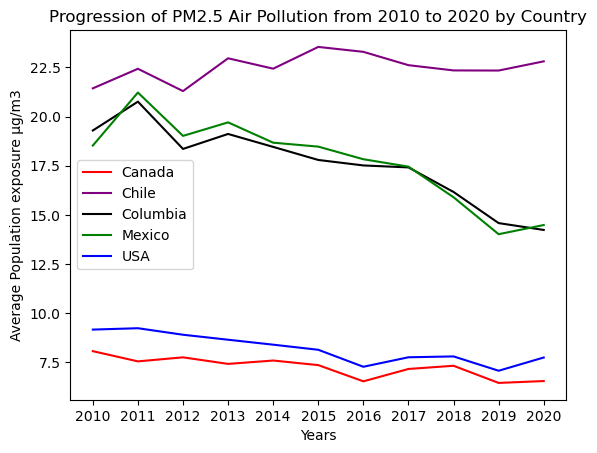

In [29]:
years = airpoll.columns[2:]

country_groups = airpoll.groupby("Country").mean()

canada = country_groups.iloc[0]
chile = country_groups.iloc[1]
columbia = country_groups.iloc[2]
mexico = country_groups.iloc[3]
usa = country_groups.iloc[4]

plt.plot(years, canada, color='red', label="Canada")
plt.plot(years, chile, color='purple', label="Chile")
plt.plot(years, columbia, color='black', label="Columbia")
plt.plot(years, mexico, color='green', label="Mexico")
plt.plot(years, usa, color='blue', label="USA")

plt.title("Progression of PM2.5 Air Pollution from 2010 to 2020 by Country")
plt.xlabel("Years")
plt.ylabel("Average Population exposure µg/m3")
plt.legend()

plt.show()

In the years spanning from 2010 to 2020, most countries observed saw the average population exposed to PM2.5 air pollution saw a decrease in exposure by the year 2020. Countries that started with an exposure of 20µg/m3 but more than 10µg/m3 (Mexico and Columbia) saw a steep decrease in their exposure. While countries that started with <10µg/m3 (Canada and USA) experienced a very steady decrease but not as drastic. Chile on the otherhand, experienced an increase in their exposure during this span of time. Evidently, over the course of 10 years, the average population exposed to PM2.5 air pollutents decreased from 2010 to 2020.

## Latitude vs Air Pollution 

The r-squared is: 0.5299269368227408
 The correlation between latitude and mean population exposure to PM2.5 air pollution in the year 2010 is -0.73


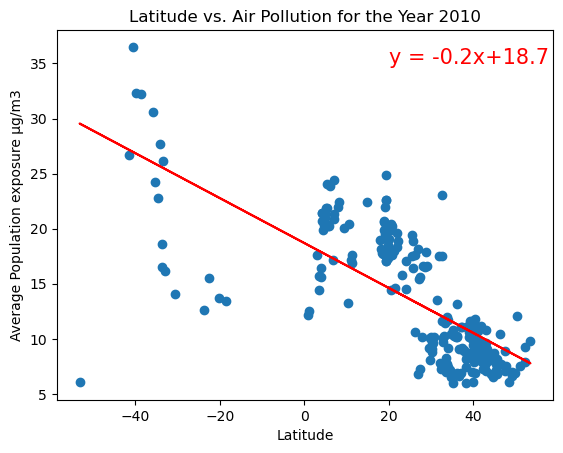

In [35]:
xvalues = merged_df_no_duplicates["lat"]
yvalues = merged_df_no_duplicates["2010"]

plt.scatter(xvalues,yvalues)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
regress_vals = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.plot(xvalues,regress_vals, "r-")
plt.annotate(line_eq, (20,35), fontsize=15, color="red")

plt.title("Latitude vs. Air Pollution for the Year 2010")
plt.xlabel("Latitude")
plt.ylabel("Average Population exposure µg/m3")


correlation = st.pearsonr(xvalues,yvalues)
print(f"The r-squared is: {rvalue**2}")
print(f" The correlation between latitude and mean population exposure to PM2.5 air pollution in the year 2010 is {round(correlation[0],2)}")


plt.show()


The r-squared is: 0.6332074299453928
 The correlation between latitude and mean population exposure to PM2.5 air pollution in the year 2020 is -0.8


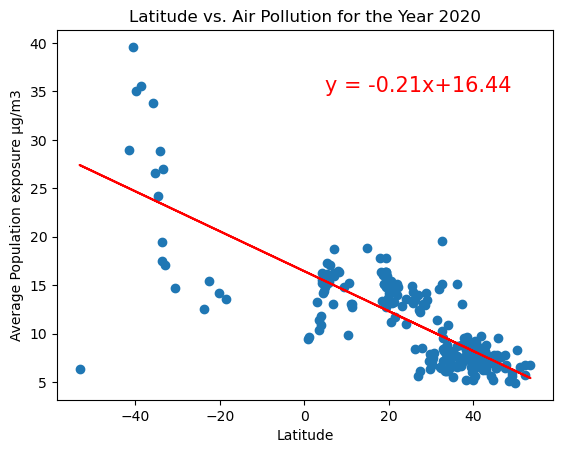

In [34]:
xvalues = merged_df_no_duplicates["lat"]
yvalues = merged_df_no_duplicates["2020"]

plt.scatter(xvalues,yvalues)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
regress_vals = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.plot(xvalues,regress_vals, "r-")
plt.annotate(line_eq, (5,35), fontsize=15, color="red")

plt.title("Latitude vs. Air Pollution for the Year 2020")
plt.xlabel("Latitude")
plt.ylabel("Average Population exposure µg/m3")


correlation = st.pearsonr(xvalues,yvalues)
print(f"The r-squared is: {rvalue**2}")
print(f" The correlation between latitude and mean population exposure to PM2.5 air pollution in the year 2020 is {round(correlation[0],2)}")

plt.show()

In both the year 2010 and 2020, the data displays that there is a strong and positive correlation between latitude and air pollution. By 2020, the correlation became slightly stronger. As well, based on the data shown, it can be said that the farther north from the equator we move, the less air pollution exposure becomes, however, there is not enough data for the southern hemisphere (latitude = <0) to say the same 